In [ ]:
import os
import json
import numpy as np
import pandas as pd
import cv2
from sklearn.decomposition import PCA
from PIL import Image
from skimage import io
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np

encoded_labels = np.load('/content/drive/MyDrive/encoded_labels.npy')
print("Loaded encoded labels shape:", encoded_labels.shape)

Loaded encoded labels shape: (125, 256, 256, 8)


In [ ]:
import numpy as np

encoded_labels = np.load('/content/drive/MyDrive/encoded_labels_str.npy')
print("Loaded encoded labels shape:", encoded_labels.shape)

Loaded encoded labels shape: (173, 256, 256, 8)


In [ ]:
import numpy as np

input_tensors = np.load('/content/drive/MyDrive/input_tensors.npy')
print("Loaded input_tensors shape:", input_tensors.shape)

Loaded input_tensors shape: (125, 256, 256, 6)


In [ ]:
import numpy as np

input_tensors = np.load('/content/drive/MyDrive/input_tensors_str.npy')
print("Loaded input_tensors shape:", input_tensors.shape)

Loaded input_tensors shape: (173, 256, 256, 6)


In [ ]:
import numpy as np

input_tensors_without = np.load('/content/drive/MyDrive/input_tensors_without.npy')
print("Loaded input_tensors shape:", input_tensors_without.shape)

Loaded input_tensors shape: (173, 256, 256, 3)


In [ ]:
x_train = np.load('/content/drive/MyDrive/x_train.npy')
x_test = np.load('/content/drive/MyDrive/x_test.npy')
y_train = np.load('/content/drive/MyDrive/y_train.npy')
y_test = np.load('/content/drive/MyDrive/y_test.npy')

In [ ]:
x_train = np.load('/content/drive/MyDrive/x_train_str.npy')
x_test = np.load('/content/drive/MyDrive/x_test_str.npy')
y_train = np.load('/content/drive/MyDrive/y_train_str.npy')
y_test = np.load('/content/drive/MyDrive/y_test_str.npy')

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

folder_path = "/content/drive/MyDrive/n_images_95"

# 初始化结果字典
results = {
    'Min': {'Red Band': None, 'Green Band': None, 'Blue Band': None},
    'Max': {'Red Band': None, 'Green Band': None, 'Blue Band': None},
    'Mean': {'Red Band': None, 'Green Band': None, 'Blue Band': None},
    'Std': {'Red Band': None, 'Green Band': None, 'Blue Band': None}
}

image_files = os.listdir(folder_path)
image_files = [file for file in image_files if not file.startswith('.')]  # 过滤掉以"."开头的文件和文件夹
total_images = len(image_files)

for file_name in image_files:
    image_path = os.path.join(folder_path, file_name)

    image = cv2.imread(image_path)

    if image is None:
        print(f"无法读取图像 {image_path}")
        continue

    red_channel = image[:, :, 2]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 0]

    # RGB三通道最小值、最大值、均值和标准差
    red_min = np.min(red_channel)
    red_max = np.max(red_channel)
    red_mean = np.mean(red_channel)
    red_std = np.std(red_channel)

    green_min = np.min(green_channel)
    green_max = np.max(green_channel)
    green_mean = np.mean(green_channel)
    green_std = np.std(green_channel)

    blue_min = np.min(blue_channel)
    blue_max = np.max(blue_channel)
    blue_mean = np.mean(blue_channel)
    blue_std = np.std(blue_channel)

    results['Min']['Red Band'] = red_min
    results['Min']['Green Band'] = green_min
    results['Min']['Blue Band'] = blue_min

    results['Max']['Red Band'] = red_max
    results['Max']['Green Band'] = green_max
    results['Max']['Blue Band'] = blue_max

    results['Mean']['Red Band'] = red_mean
    results['Mean']['Green Band'] = green_mean
    results['Mean']['Blue Band'] = blue_mean

    results['Std']['Red Band'] = red_std
    results['Std']['Green Band'] = green_std
    results['Std']['Blue Band'] = blue_std
df = pd.DataFrame(results).transpose()
print(df)

        Red Band  Green Band   Blue Band
Min    19.000000   22.000000   21.000000
Max   255.000000  255.000000  255.000000
Mean   51.910952   64.498888   53.416086
Std    10.693316   13.574956   10.011935


## **粗糙集约简获取三个纹理特征**

In [ ]:
from sklearn.decomposition import PCA
import random
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import os

# 设置随机种子
random.seed(42)

# 设置图像文件夹路径和文件名列表
folder_path = "/content/drive/MyDrive/n_images_95"
image_files = sorted(os.listdir(folder_path))
image_files = [file for file in image_files if not file.startswith('.')]  # 过滤掉以"."开头的文件和文件夹

features = []

for filename in image_files:
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    green_band = image[:, :, 1]

    distances = [1]
    angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]
    glcm = graycomatrix(green_band, distances, angles, levels=256, symmetric=True, normed=True)

    # Mean（均值）
    # Variance（方差）
    # Contrast（对比度）
    # Entropy（熵）
    # Correlation（相关性）
    # Energy（能量）
    # ASM（角二阶矩）
    # Dissimilarity（差异性）
    # Homogeneity（一致性）

    texture_features = {
        'Mean': np.mean(green_band),
        'Variance': np.var(green_band),
        'Contrast': graycoprops(glcm, 'contrast').ravel()[0],
        'Entropy': -np.sum(glcm * np.log2(glcm + 1e-10)),
        'Correlation': graycoprops(glcm, 'correlation').ravel()[0],
        'Energy': graycoprops(glcm, 'energy').ravel()[0],
        'ASM': graycoprops(glcm, 'ASM').ravel()[0],
        'Dissimilarity': graycoprops(glcm, 'dissimilarity').ravel()[0],
        'Homogeneity': graycoprops(glcm, 'homogeneity').ravel()[0]
    }
    features.append([texture_features['Mean'], texture_features['Variance'], texture_features['Contrast'],
                     texture_features['Entropy'], texture_features['Correlation'], texture_features['Energy'],
                     texture_features['ASM'], texture_features['Dissimilarity'], texture_features['Homogeneity']])
feature_matrix = np.array(features)

In [ ]:
alpha = 0.4
population_size = 70
pc = 0.3
pm = 0.05
sample_percentage = 0.3
repetitions = 100

random.seed(42)
np.random.seed(42)

attribute_names = ['Mean', 'Variance', 'Contrast', 'Entropy', 'Correlation', 'Energy', 'ASM', 'Dissimilarity', 'Homogeneity']

def rough_reduct(alpha, feature_matrix, attribute_names, num_selected):
    num_attributes = feature_matrix.shape[1]
    num_samples = feature_matrix.shape[0]

    best_selected_attributes = None
    best_fitness = 0.0

    for _ in range(repetitions):
        population = []
        for _ in range(population_size):
            chromosome = random.sample(range(num_attributes), num_selected)
            population.append(chromosome)

        def fitness(chromosome):
            selected_features = feature_matrix[:, chromosome]
            pca = PCA(n_components=num_selected)
            reduced_features = pca.fit_transform(selected_features)
            return np.sum(pca.explained_variance_ratio_)

        fitness_values = [fitness(chromosome) for chromosome in population]

        selected_indices = random.sample(range(population_size), k=int(sample_percentage * population_size))
        selected_population = [population[idx] for idx in selected_indices]
        selected_fitness_values = [fitness_values[idx] for idx in selected_indices]

        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(selected_population, 2)
            if random.random() < pc:
                crossover_point = random.randint(1, num_selected - 1)
                child1 = parent1[:crossover_point] + parent2[crossover_point:]
                child2 = parent2[:crossover_point] + parent1[crossover_point:]
                new_population.extend([child1, child2])
            else:
                new_population.extend([parent1, parent2])

        for i in range(len(new_population)):
            if random.random() < pm:
                mutated_attributes = random.sample(range(num_selected), int(pm * num_selected))
                for attr in mutated_attributes:
                    new_population[i][attr] = random.randint(0, num_attributes - 1)

        fitness_values = [fitness(chromosome) for chromosome in new_population]

        best_chromosome = population[np.argmax(fitness_values)]
        best_fitness_value = np.max(fitness_values)

        if best_fitness_value > best_fitness:
            best_fitness = best_fitness_value
            best_selected_attributes = [attribute_names[idx] for idx in best_chromosome]

    return best_selected_attributes

selected_attributes = rough_reduct(alpha, feature_matrix, attribute_names, 3)
print(selected_attributes)

['Energy', 'Correlation', 'ASM']


## **数据增强**

In [ ]:
import cv2
import os

def rotate_image_and_mask(image_path, mask_path, image_output_folder, mask_output_folder):
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    angles = [90, 180, 270]

    base_name = os.path.splitext(os.path.basename(image_path))[0]

    for angle in angles:
        M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)

        rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
        rotated_mask = cv2.warpAffine(mask, M, (mask.shape[1], mask.shape[0]))

        cv2.imwrite(os.path.join(image_output_folder, f'{base_name}_{angle}.png'), rotated_image)
        cv2.imwrite(os.path.join(mask_output_folder, f'{base_name}_{angle}.png'), rotated_mask)

image_path = '/content/drive/MyDrive/images/lower-puna-volcano_00000287_post_disaster.png'
mask_path = '/content/drive/MyDrive/VolDisaster/SegmentationClass/lower-puna-volcano_00000287_post_disaster.png'
image_output_folder = '/content/drive/MyDrive/images'
mask_output_folder = '/content/drive/MyDrive/VolDisaster/SegmentationClass'

rotate_image_and_mask(image_path, mask_path, image_output_folder, mask_output_folder)

## **标签文件**

In [ ]:
def parse_labelmap(labelmap_path):
    color_to_label = {}
    with open(labelmap_path, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines[1:]):
            parts = line.strip().split(':')
            color = tuple(map(int, parts[1].split(',')))
            color_to_label[color] = i
    return color_to_label

labelmap_path = '/content/drive/MyDrive/VolDisaster/labelmap.txt'
color_to_label = parse_labelmap(labelmap_path)

In [ ]:
print(color_to_label)

{(0, 0, 0): 0, (128, 0, 0): 1, (0, 128, 0): 2, (128, 128, 0): 3, (0, 0, 128): 4, (128, 0, 128): 5, (0, 128, 128): 6, (128, 128, 128): 7, (64, 0, 0): 8}


In [ ]:
def convert_mask_to_labels(mask, color_to_label):
    label_mask = np.zeros(mask.shape[:2], dtype=np.uint8)
    for color, label in color_to_label.items():
        label_mask[np.all(mask == color, axis=-1)] = label
    return label_mask

In [ ]:
def load_images_and_masks_str(image_folder, mask_folder, color_to_label, img_size=(256, 256)):
    images = []
    masks = []
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.png') or f.endswith('.jpg')]

    for filename in image_files:
        image_path = os.path.join(image_folder, filename)
        mask_filename = filename.split('.')[0] + '.png'
        mask_path = os.path.join(mask_folder, mask_filename)

        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path)

        if image is None or mask is None:
            continue
        image = cv2.resize(image, img_size)
        mask = cv2.resize(mask, img_size, interpolation=cv2.INTER_NEAREST)

        mask = convert_mask_to_labels(mask, color_to_label)

        images.append(image)
        masks.append(mask)

    return np.array(images), np.array(masks)

In [ ]:
from tensorflow.keras.utils import to_categorical

def encode_labels(masks, num_classes):
    encoded_masks = [to_categorical(mask, num_classes=num_classes) for mask in masks]
    return np.array(encoded_masks)

In [ ]:
labelmap_path = '/content/drive/MyDrive/VolDisaster/labelmap.txt'
color_to_label = parse_labelmap(labelmap_path)

image_folder = '/content/drive/MyDrive/images'
mask_folder = '/content/drive/MyDrive/VolDisaster/SegmentationClass'

images, masks = load_images_and_masks_str(image_folder, mask_folder, color_to_label)
encoded_labels = encode_labels(masks, num_classes=8)

print("encoded_labels shape:", encoded_labels.shape)

encoded_labels shape: (152, 256, 256, 8)


In [ ]:
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# 将 encoded_labels 保存为 npy 文件
save_path = '/content/drive/MyDrive/encoded_labels_str.npy'
np.save(save_path, encoded_labels)
print("Encoded labels saved at:", save_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Encoded labels saved at: /content/drive/MyDrive/encoded_labels_str.npy


## **把约简得到的三个纹理特征与原图像的RGB三通道合并作为模型输入张量**

In [ ]:
import os
import numpy as np
from PIL import Image
from skimage.feature import graycomatrix, graycoprops

def extract_texture_features(image):
    gray_image = image.convert('L')
    gray_array = np.array(gray_image)

    # 灰度共生矩阵
    distances = [1]  # 邻距
    angles = [0]  # 角度
    levels = 256  # 灰度级别数
    glcm = graycomatrix(gray_array, distances, angles, levels=levels, symmetric=True, normed=True)

    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    asm = graycoprops(glcm, 'ASM')[0, 0]
    # homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    # dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    # contrast = graycoprops(glcm, 'contrast')[0, 0]
    # energy = np.sum(glcm**2)
    # entropy = -np.sum(glcm * np.log2(glcm + 1e-10))
    # variance = np.var(gray_array)
    # idm = graycoprops(glcm, 'homogeneity')[0, 0]

    return energy, correlation, asm

In [ ]:
import os
import numpy as np
from PIL import Image
from skimage.feature import graycomatrix, graycoprops

input_tensors = []
image_folder = '/content/drive/MyDrive/images'
image_files = os.listdir(image_folder)
file_names = [file for file in image_files if not file.startswith('.')]

for file_name in file_names:
    image_path = os.path.join(image_folder, file_name)
    image = Image.open(image_path).convert("RGB")
    image = image.resize((256, 256))

    energy, correlation, asm = extract_texture_features(image)
    image_array = np.array(image)
    texture_features = np.expand_dims(np.array([energy, correlation, asm]), axis=(0, 1))
    texture_features = np.tile(texture_features, (image_array.shape[0], image_array.shape[1], 1))

    input_tensor = np.concatenate((image_array, texture_features), axis=2)
    input_tensors.append(input_tensor)

input_tensors = np.array(input_tensors)
print("输入张量形状:", input_tensors.shape)
# print(input_tensors)

输入张量形状: (152, 256, 256, 6)


In [ ]:
import os
import numpy as np
from PIL import Image

input_tensors = []
image_folder = '/content/drive/MyDrive/images'
image_files = os.listdir(image_folder)
file_names = [file for file in image_files if not file.startswith('.')]

for file_name in file_names:
    image_path = os.path.join(image_folder, file_name)
    image = Image.open(image_path).convert("RGB")
    image = image.resize((256, 256))
    image_array = np.array(image)
    input_tensors.append(image_array)

input_tensors = np.array(input_tensors)
print("输入张量形状:", input_tensors.shape)

输入张量形状: (152, 256, 256, 3)


In [ ]:
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# 将 encoded_labels 保存为 npy 文件
save_path = '/content/drive/MyDrive/input_tensors_without.npy'
np.save(save_path, input_tensors)
print("input_tensors saved at:", save_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
input_tensors saved at: /content/drive/MyDrive/input_tensors_without.npy


## **Unet模型**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam

def Unet(pretrained_weights=None, input_size=(256, 256, 6), classNum=8, learning_rate=1e-5):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output
    conv10 = Conv2D(classNum, 1, activation='softmax')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam

def Unet_without(pretrained_weights=None, input_size=(256, 256, 3), classNum=8, learning_rate=1e-5):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output
    conv10 = Conv2D(classNum, 1, activation='softmax')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

## **Unet+Res**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, Add, BatchNormalization, Activation

def residual_block(x, filters):
    res = Conv2D(filters, (1, 1), strides=(1, 1), padding='same')(x)
    x = Conv2D(filters, 3, activation='relu', padding='same')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = Add()([x, res])  # 添加残差连接
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def Unet_res(pretrained_weights=None, input_size=(256, 256, 6), classNum=8, learning_rate=1e-5, base_filters=32):
    inputs = Input(input_size)

    conv1 = residual_block(inputs, base_filters)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = residual_block(pool1, base_filters * 2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = residual_block(pool2, base_filters * 4)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = residual_block(pool3, base_filters * 8)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = residual_block(pool4, base_filters * 16)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(base_filters * 8, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = residual_block(merge6, base_filters * 8)

    up7 = Conv2D(base_filters * 4, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = residual_block(merge7, base_filters * 4)

    up8 = Conv2D(base_filters * 2, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = residual_block(merge8, base_filters * 2)

    up9 = Conv2D(base_filters, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = residual_block(merge9, base_filters)

    conv10 = Conv2D(classNum, 1, activation='softmax')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

## **Unet+Attention**

In [ ]:
def channel_attention(input_feature, ratio=8):
    channel = input_feature.shape[-1]
    shared_dense_one = tf.keras.layers.Dense(channel//ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)
    shared_dense_two = tf.keras.layers.Dense(channel, kernel_initializer='he_normal', use_bias=False)

    avg_pool = tf.keras.layers.GlobalAveragePooling2D()(input_feature)
    avg_pool = tf.keras.layers.Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_dense_one(avg_pool)
    avg_pool = shared_dense_two(avg_pool)
    scale = tf.keras.layers.Activation('sigmoid')(avg_pool)

    return input_feature * scale

def Unet_att(pretrained_weights=None, input_size=(256, 256, 6), classNum=8, learning_rate=1e-5, base_filters=32):
    inputs = Input(input_size)

    conv1 = Conv2D(base_filters, 3, activation='relu', padding='same')(inputs)
    conv1 = channel_attention(conv1)  # 添加通道注意力
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(base_filters * 2, 3, activation='relu', padding='same')(pool1)
    conv2 = channel_attention(conv2)  # 添加通道注意力
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(base_filters * 4, 3, activation='relu', padding='same')(pool2)
    conv3 = channel_attention(conv3)  # 添加通道注意力
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(base_filters * 8, 3, activation='relu', padding='same')(pool3)
    conv4 = channel_attention(conv4)  # 添加通道注意力
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(base_filters * 16, 3, activation='relu', padding='same')(pool4)
    conv5 = channel_attention(conv5)  # 添加通道注意力
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(base_filters * 8, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(base_filters * 8, 3, activation='relu', padding='same')(merge6)
    conv6 = channel_attention(conv6)  # 添加通道注意力

    up7 = Conv2D(base_filters * 4, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(base_filters * 4, 3, activation='relu', padding='same')(merge7)
    conv7 = channel_attention(conv7)  # 添加通道注意力

    up8 = Conv2D(base_filters * 2, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(base_filters * 2, 3, activation='relu', padding='same')(merge8)
    conv8 = channel_attention(conv8)  # 添加通道注意力

    up9 = Conv2D(base_filters, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(base_filters, 3, activation='relu', padding='same')(merge9)
    conv9 = channel_attention(conv9)  # 添加通道注意力

    conv10 = Conv2D(classNum, 1, activation='softmax')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

## **Unet+Attention+Resnet**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate,
                                     Dropout, Add, BatchNormalization, Activation, SeparableConv2D)
from tensorflow.keras.optimizers import Adam

def channel_attention(input_feature, ratio=8):
    channel = input_feature.shape[-1]
    shared_dense_one = tf.keras.layers.Dense(channel//ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)
    shared_dense_two = tf.keras.layers.Dense(channel, kernel_initializer='he_normal', use_bias=False)

    avg_pool = tf.keras.layers.GlobalAveragePooling2D()(input_feature)
    avg_pool = tf.keras.layers.Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_dense_one(avg_pool)
    avg_pool = shared_dense_two(avg_pool)
    scale = tf.keras.layers.Activation('sigmoid')(avg_pool)

    return input_feature * scale

def residual_attention_block(x, filters):
    res = Conv2D(filters, (1, 1), strides=(1, 1), padding='same')(x)
    x = SeparableConv2D(filters, 3, activation='relu', padding='same')(x)
    x = SeparableConv2D(filters, 3, padding='same')(x)
    x = Add()([x, res])
    x = channel_attention(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def Unet_res_att(pretrained_weights=None, input_size=(256, 256, 6), classNum=8, learning_rate=1e-5, base_filters=32):
    inputs = Input(input_size)

    # Encoder
    conv1 = residual_attention_block(inputs, base_filters)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = residual_attention_block(pool1, base_filters * 2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = residual_attention_block(pool2, base_filters * 4)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = residual_attention_block(pool3, base_filters * 8)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = residual_attention_block(pool4, base_filters * 16)
    drop5 = Dropout(0.5)(conv5)

    # Decoder
    up6 = Conv2D(base_filters * 8, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = residual_attention_block(merge6, base_filters * 8)

    up7 = Conv2D(base_filters * 4, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = residual_attention_block(merge7, base_filters * 4)

    up8 = Conv2D(base_filters * 2, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = residual_attention_block(merge8, base_filters * 2)

    up9 = Conv2D(base_filters, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = residual_attention_block(merge9, base_filters)

    # Output layer
    conv10 = Conv2D(classNum, 1, activation='softmax')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

## **FCN**

In [ ]:
from tensorflow.keras.layers import Input, BatchNormalization, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam

def FCN(pretrained_weights=None, input_size=(256, 256, 6), classNum=8, learning_rate=1e-5):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder
    up6 = Conv2DTranspose(512, 3, strides=(2, 2), activation='relu', padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(256, 3, strides=(2, 2), activation='relu', padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(128, 3, strides=(2, 2), activation='relu', padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, 3, strides=(2, 2), activation='relu', padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output
    conv10 = Conv2D(classNum, 1, activation='softmax')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

## **划分数据集**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_tensors, encoded_labels, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (121, 256, 256, 3)
x_test shape: (31, 256, 256, 3)
y_train shape: (121, 256, 256, 8)
y_test shape: (31, 256, 256, 8)


In [ ]:
np.save('/content/drive/MyDrive/x_train_str_without.npy', x_train)
np.save('/content/drive/MyDrive/x_test_str_without.npy', x_test)
np.save('/content/drive/MyDrive/y_train_str_without.npy', y_train)
np.save('/content/drive/MyDrive/y_test_str_without.npy', y_test)

print("Datasets saved successfully.")

Datasets saved successfully.


In [ ]:
save_path = '/content/drive/MyDrive/test_dataaaa.npz'
np.savez(save_path, x_test=x_test, y_test=y_test)

print(f"Data saved to {save_path}")

Data saved to /content/drive/MyDrive/test_dataaaa.npz


## **Unet训练**

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import numpy as np
import time
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

start_time = time.time()

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{epochs}")
        print("Train - loss: {:.4f} - accuracy: {:.4f}".format(logs["loss"], logs["accuracy"]))
        print("Test - loss: {:.4f} - accuracy: {:.4f}".format(logs["val_loss"], logs["val_accuracy"]))
        print("Learning rate:", self.model.optimizer.lr.numpy())  # 输出当前的学习率


model_unet = Unet(input_size=(256, 256, 6), classNum=8, learning_rate=1e-3)
optimizer = Adam(learning_rate=1e-3, clipvalue=0.5)  # 设置梯度裁剪的阈值
model_unet.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
epochs = 200

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model_unet.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[CustomCallback(), reduce_lr, early_stop])

end_time = time.time()
total_time = end_time - start_time
print("训练总时长:", total_time, "秒")

loss, accuracy = model_unet.evaluate(x_test, y_test)
print("Test set - loss: {:.4f} - accuracy: {:.4f}".format(loss, accuracy))

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 104.1896 - accuracy: 0.1882Epoch 1/200
Train - loss: 104.1896 - accuracy: 0.1882
Test - loss: 1.9130 - accuracy: 0.2754
Learning rate: 0.001
4/4 [==============================] - 9s 945ms/step - loss: 104.1896 - accuracy: 0.1882 - val_loss: 1.9130 - val_accuracy: 0.2754 - lr: 0.0010
Epoch 2/200
3/4 [=====================>........] - ETA: 0s - loss: 1.7632 - accuracy: 0.3429

4/4 [==============================] - ETA: 0s - loss: 1.7714 - accuracy: 0.3439Epoch 2/200
Train - loss: 1.7714 - accuracy: 0.3439
Test - loss: 1.4507 - accuracy: 0.4827
Learning rate: 0.001
4/4 [==============================] - 3s 706ms/step - loss: 1.7714 - accuracy: 0.3439 - val_loss: 1.4507 - val_accuracy: 0.4827 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 1.5163 - accuracy: 0.5267Epoch 3/200
Train - loss: 1.5163 - accuracy: 0.5267
Test - loss: 1.3188 - accuracy: 0.4332
Learning rate: 0.001
4/4 [==============================] - 3s 698ms/step - loss: 1.5163 - accuracy: 0.5267 - val_loss: 1.3188 - val_accuracy: 0.4332 - lr: 0.0010
Epoch 4/200
4/4 [==============================] - ETA: 0s - loss: 1.4501 - accuracy: 0.3564Epoch 4/200
Train - loss: 1.4501 - accuracy: 0.3564
Test - loss: 1.1363 - accuracy: 0.5815
Learning rate: 0.001
4/4 [==============================] - 3s 686ms/step - loss: 1.4501 - accuracy: 0.3564 - val_loss: 1.1363 - val_accu

In [ ]:
import pickle

history_path = '/content/drive/MyDrive/Unet_history_str.pkl'

with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model_unet.save('/content/drive/MyDrive/Unet_str.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import numpy as np
import time
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

start_time = time.time()

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{epochs}")
        print("Train - loss: {:.4f} - accuracy: {:.4f}".format(logs["loss"], logs["accuracy"]))
        print("Test - loss: {:.4f} - accuracy: {:.4f}".format(logs["val_loss"], logs["val_accuracy"]))
        print("Learning rate:", self.model.optimizer.lr.numpy())  # 输出当前的学习率

model_unet_without = Unet_without(input_size=(256, 256, 3), classNum=8, learning_rate=1e-3)
optimizer = Adam(learning_rate=1e-3, clipvalue=0.5)  # 设置梯度裁剪的阈值
model_unet_without.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
epochs = 200

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model_unet_without.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[CustomCallback(), reduce_lr, early_stop])

end_time = time.time()
total_time = end_time - start_time
print("训练总时长:", total_time, "秒")

loss, accuracy = model_unet_without.evaluate(x_test, y_test)
print("Test set - loss: {:.4f} - accuracy: {:.4f}".format(loss, accuracy))

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 255.2603 - accuracy: 0.2471Epoch 1/200
Train - loss: 255.2603 - accuracy: 0.2471
Test - loss: 2.3941 - accuracy: 0.2106
Learning rate: 0.001
4/4 [==============================] - 31s 8s/step - loss: 255.2603 - accuracy: 0.2471 - val_loss: 2.3941 - val_accuracy: 0.2106 - lr: 0.0010
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 1.8974 - accuracy: 0.3309Epoch 2/200
Train - loss: 1.8974 - accuracy: 0.3309
Test - loss: 1.3959 - accuracy: 0.3884
Learning rate: 0.001
4/4 [==============================] - 3s 691ms/step - loss: 1.8974 - accuracy: 0.3309 - val_loss: 1.3959 - val_accuracy: 0.3884 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 1.3852 - accuracy: 0.4643Epoch 3/200
Train - loss: 1.3852 - accuracy: 0.4643
Test - loss: 1.3468 - accuracy: 0.3925
Learning rate: 0.001
4/4 [==============================] - 3s 691ms/step - loss: 1.3852 - accuracy: 0.4643 - val_loss: 1

In [ ]:
import pickle

history_path = '/content/drive/MyDrive/Unet_without_history_str.pkl'

with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model_unet_without.save('/content/drive/MyDrive/Unet_without_str.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Unet_res训练**

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import numpy as np
import time
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

start_time = time.time()

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{epochs}")
        print("Train - loss: {:.4f} - accuracy: {:.4f}".format(logs["loss"], logs["accuracy"]))
        print("Test - loss: {:.4f} - accuracy: {:.4f}".format(logs["val_loss"], logs["val_accuracy"]))
        print("Learning rate:", self.model.optimizer.lr.numpy())  # 输出当前的学习率

model_unet_res = Unet_res(input_size=(256, 256, 6), classNum=8, learning_rate=1e-3)
optimizer = Adam(learning_rate=1e-3, clipvalue=0.5)  # 设置梯度裁剪的阈值
model_unet_res.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
epochs = 200

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model_unet_res.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[CustomCallback(), reduce_lr, early_stop])

end_time = time.time()
total_time = end_time - start_time
print("训练总时长:", total_time, "秒")

loss, accuracy = model_unet_res.evaluate(x_test, y_test)
print("Test set - loss: {:.4f} - accuracy: {:.4f}".format(loss, accuracy))

Epoch 1/200
5/5 [==============================] - ETA: 0s - loss: 2.1032 - accuracy: 0.2430Epoch 1/200
Train - loss: 2.1032 - accuracy: 0.2430
Test - loss: 327.0016 - accuracy: 0.1587
Learning rate: 0.001
5/5 [==============================] - 28s 2s/step - loss: 2.1032 - accuracy: 0.2430 - val_loss: 327.0016 - val_accuracy: 0.1587 - lr: 0.0010
Epoch 2/200
5/5 [==============================] - ETA: 0s - loss: 1.5461 - accuracy: 0.5453Epoch 2/200
Train - loss: 1.5461 - accuracy: 0.5453
Test - loss: 1067.1344 - accuracy: 0.1596
Learning rate: 0.001
5/5 [==============================] - 2s 320ms/step - loss: 1.5461 - accuracy: 0.5453 - val_loss: 1067.1344 - val_accuracy: 0.1596 - lr: 0.0010
Epoch 3/200
5/5 [==============================] - ETA: 0s - loss: 1.3751 - accuracy: 0.6154Epoch 3/200
Train - loss: 1.3751 - accuracy: 0.6154
Test - loss: 1243.7501 - accuracy: 0.1596
Learning rate: 0.001
5/5 [==============================] - 2s 324ms/step - loss: 1.3751 - accuracy: 0.6154 - val_

In [ ]:
import pickle

history_path = '/content/drive/MyDrive/Unet_res_history_str.pkl'

with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model_unet_res.save('/content/drive/MyDrive/Unet_res_str.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Unet_att训练**

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import numpy as np
import time
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

start_time = time.time()

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{epochs}")
        print("Train - loss: {:.4f} - accuracy: {:.4f}".format(logs["loss"], logs["accuracy"]))
        print("Test - loss: {:.4f} - accuracy: {:.4f}".format(logs["val_loss"], logs["val_accuracy"]))
        print("Learning rate:", self.model.optimizer.lr.numpy())  # 输出当前的学习率

model_unet_att = Unet_att(input_size=(256, 256, 6), classNum=8, learning_rate=1e-3)
optimizer = Adam(learning_rate=1e-3, clipvalue=0.5)  # 设置梯度裁剪的阈值
model_unet_att.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
epochs = 200

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model_unet_att.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[CustomCallback(), reduce_lr, early_stop])

end_time = time.time()
total_time = end_time - start_time
print("训练总时长:", total_time, "秒")

loss, accuracy = model_unet_att.evaluate(x_test, y_test)
print("Test set - loss: {:.4f} - accuracy: {:.4f}".format(loss, accuracy))

Epoch 1/200
5/5 [==============================] - ETA: 0s - loss: 3.5716 - accuracy: 0.2057Epoch 1/200
Train - loss: 3.5716 - accuracy: 0.2057
Test - loss: 2.1272 - accuracy: 0.2738
Learning rate: 0.001
5/5 [==============================] - 21s 1s/step - loss: 3.5716 - accuracy: 0.2057 - val_loss: 2.1272 - val_accuracy: 0.2738 - lr: 0.0010
Epoch 2/200
5/5 [==============================] - ETA: 0s - loss: 1.9303 - accuracy: 0.3006Epoch 2/200
Train - loss: 1.9303 - accuracy: 0.3006
Test - loss: 1.6594 - accuracy: 0.5460
Learning rate: 0.001
5/5 [==============================] - 1s 245ms/step - loss: 1.9303 - accuracy: 0.3006 - val_loss: 1.6594 - val_accuracy: 0.5460 - lr: 0.0010
Epoch 3/200
5/5 [==============================] - ETA: 0s - loss: 1.6145 - accuracy: 0.4411Epoch 3/200
Train - loss: 1.6145 - accuracy: 0.4411
Test - loss: 1.3996 - accuracy: 0.5146
Learning rate: 0.001
5/5 [==============================] - 1s 246ms/step - loss: 1.6145 - accuracy: 0.4411 - val_loss: 1.3996 

In [ ]:
import pickle

history_path = '/content/drive/MyDrive/Unet_att_history_str.pkl'

with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model_unet_att.save('/content/drive/MyDrive/Unet_att_str.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Unet_res_att训练**

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import numpy as np
import time
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

start_time = time.time()

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{epochs}")
        print("Train - loss: {:.4f} - accuracy: {:.4f}".format(logs["loss"], logs["accuracy"]))
        print("Test - loss: {:.4f} - accuracy: {:.4f}".format(logs["val_loss"], logs["val_accuracy"]))
        print("Learning rate:", self.model.optimizer.lr.numpy())  # 输出当前的学习率

model_unet_res_att = Unet_res_att(input_size=(256, 256, 6), classNum=8, learning_rate=1e-3)
optimizer = Adam(learning_rate=1e-3, clipvalue=0.5)  # 设置梯度裁剪的阈值
model_unet_res_att.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
epochs = 200

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model_unet_res_att.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[CustomCallback(), reduce_lr, early_stop])

end_time = time.time()
total_time = end_time - start_time
print("训练总时长:", total_time, "秒")

loss, accuracy = model_unet_res_att.evaluate(x_test, y_test)
print("Test set - loss: {:.4f} - accuracy: {:.4f}".format(loss, accuracy))

Epoch 1/200
5/5 [==============================] - ETA: 0s - loss: 2.0952 - accuracy: 0.1876Epoch 1/200
Train - loss: 2.0952 - accuracy: 0.1876
Test - loss: 3.8237 - accuracy: 0.1773
Learning rate: 0.001
5/5 [==============================] - 24s 1s/step - loss: 2.0952 - accuracy: 0.1876 - val_loss: 3.8237 - val_accuracy: 0.1773 - lr: 0.0010
Epoch 2/200
5/5 [==============================] - ETA: 0s - loss: 1.6364 - accuracy: 0.4666Epoch 2/200
Train - loss: 1.6364 - accuracy: 0.4666
Test - loss: 3.4223 - accuracy: 0.2610
Learning rate: 0.001
5/5 [==============================] - 3s 502ms/step - loss: 1.6364 - accuracy: 0.4666 - val_loss: 3.4223 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 3/200
5/5 [==============================] - ETA: 0s - loss: 1.4345 - accuracy: 0.5624Epoch 3/200
Train - loss: 1.4345 - accuracy: 0.5624
Test - loss: 3.1817 - accuracy: 0.2640
Learning rate: 0.001
5/5 [==============================] - 3s 506ms/step - loss: 1.4345 - accuracy: 0.5624 - val_loss: 3.1817 

In [ ]:
import pickle

history_path = '/content/drive/MyDrive/Unet_res_att_history.pkl'

with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model_unet_res_att.save('/content/drive/MyDrive/Unet_res_att.h5')

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import numpy as np
import time
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

start_time = time.time()

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{epochs}")
        print("Train - loss: {:.4f} - accuracy: {:.4f}".format(logs["loss"], logs["accuracy"]))
        print("Test - loss: {:.4f} - accuracy: {:.4f}".format(logs["val_loss"], logs["val_accuracy"]))
        print("Learning rate:", self.model.optimizer.lr.numpy())  # 输出当前的学习率

model_fcn = FCN(input_size=(256, 256, 6), classNum=8, learning_rate=1e-3)
optimizer = Adam(learning_rate=1e-3, clipvalue=0.5)  # 设置梯度裁剪的阈值
model_fcn.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
epochs = 200

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model_fcn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[CustomCallback(), reduce_lr, early_stop])

end_time = time.time()
total_time = end_time - start_time
print("训练总时长:", total_time, "秒")

loss, accuracy = model_fcn.evaluate(x_test, y_test)
print("Test set - loss: {:.4f} - accuracy: {:.4f}".format(loss, accuracy))

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 303.1586 - accuracy: 0.2505Epoch 1/200
Train - loss: 303.1586 - accuracy: 0.2505
Test - loss: 3.4711 - accuracy: 0.1949
Learning rate: 0.001
4/4 [==============================] - 38s 4s/step - loss: 303.1586 - accuracy: 0.2505 - val_loss: 3.4711 - val_accuracy: 0.1949 - lr: 0.0010
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 2.0872 - accuracy: 0.4214Epoch 2/200
Train - loss: 2.0872 - accuracy: 0.4214
Test - loss: 1.4181 - accuracy: 0.5805
Learning rate: 0.001
4/4 [==============================] - 2s 496ms/step - loss: 2.0872 - accuracy: 0.4214 - val_loss: 1.4181 - val_accuracy: 0.5805 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 1.4537 - accuracy: 0.4590Epoch 3/200
Train - loss: 1.4537 - accuracy: 0.4590
Test - loss: 1.4345 - accuracy: 0.5350
Learning rate: 0.001
4/4 [==============================] - 2s 462ms/step - loss: 1.4537 - accuracy: 0.4590 - val_loss: 1

In [ ]:
model_fcn.save('/content/drive/MyDrive/FCN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

history_path = '/content/drive/MyDrive/FCN_history.pkl'

with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def SegNet(pretrained_weights=None, input_size=(256, 256, 6), classNum=8, learning_rate=1e-5):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, 3, activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool2)
    up_conv1 = Conv2D(64, 2, activation='relu', padding='same')(up1)

    up2 = UpSampling2D(size=(2, 2))(up_conv1)
    up_conv2 = Conv2D(32, 2, activation='relu', padding='same')(up2)

    # Output
    outputs = Conv2D(classNum, 1, activation='softmax')(up_conv2)

    model = Model(inputs=inputs, outputs=outputs)
    optimizer = Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model


In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import numpy as np
import time
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

start_time = time.time()

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{epochs}")
        print("Train - loss: {:.4f} - accuracy: {:.4f}".format(logs["loss"], logs["accuracy"]))
        print("Test - loss: {:.4f} - accuracy: {:.4f}".format(logs["val_loss"], logs["val_accuracy"]))
        print("Learning rate:", self.model.optimizer.lr.numpy())  # 输出当前的学习率

model_seg = SegNet(input_size=(256, 256, 6), classNum=8, learning_rate=1e-3)
optimizer = Adam(learning_rate=1e-3, clipvalue=0.5)  # 设置梯度裁剪的阈值
model_seg.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
epochs = 200

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model_seg.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[CustomCallback(), reduce_lr, early_stop])

end_time = time.time()
total_time = end_time - start_time
print("训练总时长:", total_time, "秒")

loss, accuracy = model_seg.evaluate(x_test, y_test)
print("Test set - loss: {:.4f} - accuracy: {:.4f}".format(loss, accuracy))

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 3.8172 - accuracy: 0.1788Epoch 1/200
Train - loss: 3.8172 - accuracy: 0.1788
Test - loss: 1.6042 - accuracy: 0.5129
Learning rate: 0.001
4/4 [==============================] - 5s 546ms/step - loss: 3.8172 - accuracy: 0.1788 - val_loss: 1.6042 - val_accuracy: 0.5129 - lr: 0.0010
Epoch 2/200
3/4 [=====================>........] - ETA: 0s - loss: 1.6456 - accuracy: 0.5560Epoch 2/200
Train - loss: 1.6199 - accuracy: 0.5639
Test - loss: 1.3322 - accuracy: 0.6386
Learning rate: 0.001
4/4 [==============================] - 0s 84ms/step - loss: 1.6199 - accuracy: 0.5639 - val_loss: 1.3322 - val_accuracy: 0.6386 - lr: 0.0010
Epoch 3/200
3/4 [=====================>........] - ETA: 0s - loss: 1.4202 - accuracy: 0.5664Epoch 3/200
Train - loss: 1.4104 - accuracy: 0.5664
Test - loss: 1.1985 - accuracy: 0.7009
Learning rate: 0.001
4/4 [==============================] - 0s 86ms/step - loss: 1.4104 - accuracy: 0.5664 - val_loss: 1.1985 

In [ ]:
model_seg.save('/content/drive/MyDrive/SegNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

history_path = '/content/drive/MyDrive/SegNet_history.pkl'

with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout, BatchNormalization, Activation, AveragePooling2D, UpSampling2D, Cropping2D, ZeroPadding2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def PSPNet(pretrained_weights=None, input_size=(256, 256, 6), classNum=8, learning_rate=1e-5):
    inputs = Input(input_size)

    # Define the PSPNet architecture
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Pyramid Pooling Module
    pool_size = [(1, 1), (2, 2), (4, 4), (8, 8)]
    pool_outputs = [conv5]
    for p in pool_size:
        pool = AveragePooling2D(pool_size=p)(conv5)
        pool = Conv2D(256, 1, activation='relu')(pool)
        pool = UpSampling2D(size=p)(pool)
        pool_outputs.append(pool)

    # Concatenate the pyramid pooling outputs
    psp_concat = concatenate(pool_outputs, axis=3)

    # Final convolution
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(psp_concat)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    # Decoder
    up7 = Conv2DTranspose(256, 3, strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, drop4], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(128, 3, strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv3], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, 3, strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv2], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    up10 = Conv2DTranspose(32, 3, strides=(2, 2), padding='same')(conv9)
    up10 = concatenate([up10, conv1], axis=3)
    conv10 = Conv2D(32, 3, activation='relu', padding='same')(up10)
    conv10 = Conv2D(32, 3, activation='relu', padding='same')(conv10)

    # Output
    output = Conv2D(classNum, 1, activation='softmax')(conv10)

    model = Model(inputs=inputs, outputs=output)
    optimizer = Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import numpy as np
import time
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

start_time = time.time()

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{epochs}")
        print("Train - loss: {:.4f} - accuracy: {:.4f}".format(logs["loss"], logs["accuracy"]))
        print("Test - loss: {:.4f} - accuracy: {:.4f}".format(logs["val_loss"], logs["val_accuracy"]))
        print("Learning rate:", self.model.optimizer.lr.numpy())  # 输出当前的学习率

model_psp = PSPNet(input_size=(256, 256, 6), classNum=8, learning_rate=1e-3)
optimizer = Adam(learning_rate=1e-3, clipvalue=0.5)  # 设置梯度裁剪的阈值
model_psp.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
epochs = 200

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model_psp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[CustomCallback(), reduce_lr, early_stop])

end_time = time.time()
total_time = end_time - start_time
print("训练总时长:", total_time, "秒")

loss, accuracy = model_psp.evaluate(x_test, y_test)
print("Test set - loss: {:.4f} - accuracy: {:.4f}".format(loss, accuracy))

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 6.1324 - accuracy: 0.1550Epoch 1/200
Train - loss: 6.1324 - accuracy: 0.1550
Test - loss: 2.2613 - accuracy: 0.5870
Learning rate: 0.001
4/4 [==============================] - 36s 4s/step - loss: 6.1324 - accuracy: 0.1550 - val_loss: 2.2613 - val_accuracy: 0.5870 - lr: 0.0010
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 2.2787 - accuracy: 0.5287Epoch 2/200
Train - loss: 2.2787 - accuracy: 0.5287
Test - loss: 1.7297 - accuracy: 0.5407
Learning rate: 0.001
4/4 [==============================] - 2s 393ms/step - loss: 2.2787 - accuracy: 0.5287 - val_loss: 1.7297 - val_accuracy: 0.5407 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 1.7052 - accuracy: 0.5013Epoch 3/200
Train - loss: 1.7052 - accuracy: 0.5013
Test - loss: 1.5725 - accuracy: 0.6074
Learning rate: 0.001
4/4 [==============================] - 2s 390ms/step - loss: 1.7052 - accuracy: 0.5013 - val_loss: 1.5725 

In [ ]:
model_psp.save('/content/drive/MyDrive/PSPNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

history_path = '/content/drive/MyDrive/PSPNet_history.pkl'

with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def conv_block(inputs, filters, kernel_size=3, activation='relu'):
    x = Conv2D(filters, kernel_size, activation=activation, padding='same')(inputs)
    x = Conv2D(filters, kernel_size, activation=activation, padding='same')(x)
    return x

def up_block(inputs, skip, filters, kernel_size=3, activation='relu'):
    x = UpSampling2D(size=(2, 2))(inputs)
    x = concatenate([x, skip], axis=3)
    x = conv_block(x, filters, kernel_size, activation)
    return x

def UnetPP(pretrained_weights=None, input_size=(256, 256, 6), classNum=8, learning_rate=1e-5):
    inputs = Input(input_size)

    # Encoder
    conv1 = conv_block(inputs, 64)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = conv_block(pool1, 128)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = conv_block(pool2, 256)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = conv_block(pool3, 512)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottom
    conv5 = conv_block(pool4, 1024)

    # Decoder
    up6 = up_block(conv5, conv4, 512)
    up7 = up_block(up6, conv3, 256)
    up8 = up_block(up7, conv2, 128)
    up9 = up_block(up8, conv1, 64)

    # Output
    outputs = Conv2D(classNum, 1, activation='softmax')(up9)

    model = Model(inputs=inputs, outputs=outputs)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import numpy as np
import time
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

start_time = time.time()

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{epochs}")
        print("Train - loss: {:.4f} - accuracy: {:.4f}".format(logs["loss"], logs["accuracy"]))
        print("Test - loss: {:.4f} - accuracy: {:.4f}".format(logs["val_loss"], logs["val_accuracy"]))
        print("Learning rate:", self.model.optimizer.lr.numpy())  # 输出当前的学习率

model_unetpp = UnetPP(input_size=(256, 256, 6), classNum=8, learning_rate=1e-3)
optimizer = Adam(learning_rate=1e-3, clipvalue=0.5)  # 设置梯度裁剪的阈值
model_unetpp.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
epochs = 200

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model_unetpp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[CustomCallback(), reduce_lr, early_stop])

end_time = time.time()
total_time = end_time - start_time
print("训练总时长:", total_time, "秒")

loss, accuracy = model_unetpp.evaluate(x_test, y_test)
print("Test set - loss: {:.4f} - accuracy: {:.4f}".format(loss, accuracy))

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 93.3254 - accuracy: 0.2063Epoch 1/200
Train - loss: 93.3254 - accuracy: 0.2063
Test - loss: 2.3064 - accuracy: 0.0881
Learning rate: 0.001
4/4 [==============================] - 25s 2s/step - loss: 93.3254 - accuracy: 0.2063 - val_loss: 2.3064 - val_accuracy: 0.0881 - lr: 0.0010
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 1.8620 - accuracy: 0.2966Epoch 2/200
Train - loss: 1.8620 - accuracy: 0.2966
Test - loss: 1.4275 - accuracy: 0.5800
Learning rate: 0.001
4/4 [==============================] - 2s 432ms/step - loss: 1.8620 - accuracy: 0.2966 - val_loss: 1.4275 - val_accuracy: 0.5800 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 1.4356 - accuracy: 0.4894Epoch 3/200
Train - loss: 1.4356 - accuracy: 0.4894
Test - loss: 1.3434 - accuracy: 0.6392
Learning rate: 0.001
4/4 [==============================] - 2s 424ms/step - loss: 1.4356 - accuracy: 0.4894 - val_loss: 1.34

In [ ]:
model_unetpp.save('/content/drive/MyDrive/UnetPP.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

history_path = '/content/drive/MyDrive/UNetPP_history.pkl'

with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, UpSampling2D, ZeroPadding2D, DepthwiseConv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def AtrousSpatialPyramidPooling(inputs, filters):
    # Global average pooling
    shape = inputs.shape
    y1 = tf.keras.layers.AveragePooling2D(pool_size=(shape[1], shape[2]))(inputs)
    y1 = Conv2D(filters, 1, padding='same')(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation('relu')(y1)
    y1 = UpSampling2D(size=(shape[1], shape[2]))(y1)

    # 1x1 convolution
    y2 = Conv2D(filters, 1, padding='same')(inputs)
    y2 = BatchNormalization()(y2)
    y2 = Activation('relu')(y2)

    # 3x3 convolution with different rates
    y3 = Conv2D(filters, 3, padding='same', dilation_rate=6)(inputs)
    y3 = BatchNormalization()(y3)
    y3 = Activation('relu')(y3)

    y4 = Conv2D(filters, 3, padding='same', dilation_rate=12)(inputs)
    y4 = BatchNormalization()(y4)
    y4 = Activation('relu')(y4)

    y5 = Conv2D(filters, 3, padding='same', dilation_rate=18)(inputs)
    y5 = BatchNormalization()(y5)
    y5 = Activation('relu')(y5)

    return tf.keras.layers.Concatenate()([y1, y2, y3, y4, y5])

def DeepLabV3(pretrained_weights=None, input_size=(256, 256, 6), classNum=8, learning_rate=1e-5):
    inputs = Input(input_size)
    x = Conv2D(64, 3, padding='same', activation='relu')(inputs)
    x = Conv2D(64, 3, padding='same', activation='relu')(x)

    # Atrous Spatial Pyramid Pooling
    shape = x.shape
    y1 = tf.keras.layers.AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(256, 1, padding='same')(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation('relu')(y1)
    y1 = UpSampling2D(size=(shape[1], shape[2]))(y1)

    y2 = Conv2D(256, 1, padding='same')(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation('relu')(y2)

    y3 = Conv2D(256, 3, padding='same', dilation_rate=6)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation('relu')(y3)

    y4 = Conv2D(256, 3, padding='same', dilation_rate=12)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation('relu')(y4)

    y5 = Conv2D(256, 3, padding='same', dilation_rate=18)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation('relu')(y5)

    x = concatenate([y1, y2, y3, y4, y5], axis=3)
    x = Conv2D(classNum, 1, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    optimizer = Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

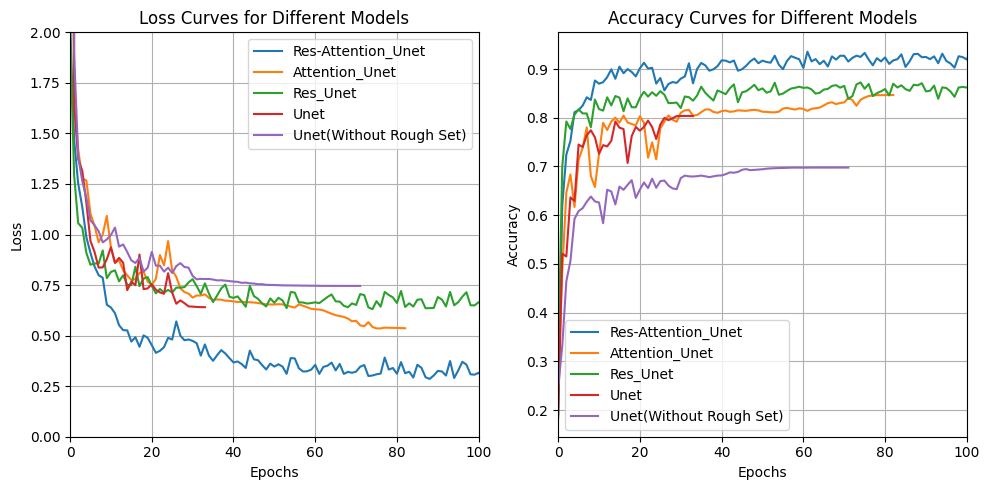

In [ ]:
import pickle
import matplotlib.pyplot as plt

# 加载历史数据
with open('/content/drive/MyDrive/Unet_res_att_history.pkl', 'rb') as f:
    unet_res_att_history = pickle.load(f)

with open('/content/drive/MyDrive/Unet_att_history.pkl', 'rb') as f:
    unet_att_history = pickle.load(f)

with open('/content/drive/MyDrive/Unet_res_history.pkl', 'rb') as f:
    unet_res_history = pickle.load(f)

with open('/content/drive/MyDrive/Unet_history.pkl', 'rb') as f:
    unet_history = pickle.load(f)

with open('/content/drive/MyDrive/Unet_without_history_str.pkl', 'rb') as f:
    unet_without_history = pickle.load(f)

# 绘制loss和准确率曲线
plt.figure(figsize=(10, 5))

# Loss曲线
plt.subplot(1, 2, 1)
plt.plot(unet_res_att_history['loss'], label='Res-Attention_Unet')
plt.plot(unet_att_history['loss'], label='Attention_Unet')
plt.plot(unet_res_history['loss'], label='Res_Unet')
plt.plot(unet_history['loss'], label='Unet')
plt.plot(unet_without_history['loss'], label='Unet(Without Rough Set)')

plt.title('Loss Curves for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 2)  # 设置纵轴范围
plt.xlim(0, 100)  # 设置横轴范围
plt.legend()
plt.grid(True)

# Accuracy曲线
plt.subplot(1, 2, 2)
plt.plot(unet_res_att_history['accuracy'], label='Res-Attention_Unet')
plt.plot(unet_att_history['accuracy'], label='Attention_Unet')
plt.plot(unet_res_history['accuracy'], label='Res_Unet')
plt.plot(unet_history['accuracy'], label='Unet')
plt.plot(unet_without_history['accuracy'], label='Unet(Without Rough Set)')

plt.title('Accuracy Curves for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0, 100)  # 设置横轴范围
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


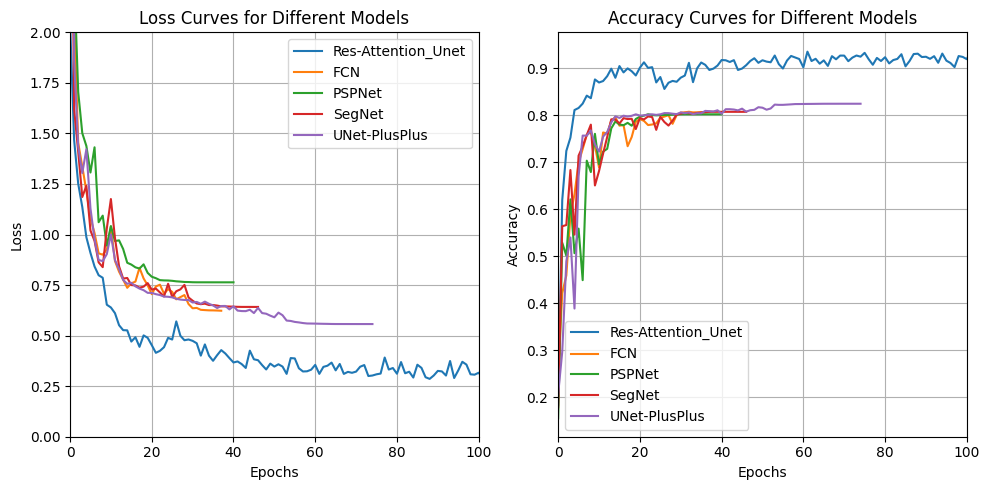

In [ ]:
import pickle
import matplotlib.pyplot as plt

# 加载历史数据
with open('/content/drive/MyDrive/Unet_res_att_history.pkl', 'rb') as f:
    unet_res_att_history = pickle.load(f)

with open('/content/drive/MyDrive/FCN_history.pkl', 'rb') as f:
    fcn_history = pickle.load(f)

with open('/content/drive/MyDrive/PSPNet_history.pkl', 'rb') as f:
    psp_history = pickle.load(f)

with open('/content/drive/MyDrive/SegNet_history.pkl', 'rb') as f:
    seg_history = pickle.load(f)

with open('/content/drive/MyDrive/UNetPP_history.pkl', 'rb') as f:
    unetpp_history = pickle.load(f)

# 绘制loss和准确率曲线
plt.figure(figsize=(10, 5))

# Loss曲线
plt.subplot(1, 2, 1)
plt.plot(unet_res_att_history['loss'], label='Res-Attention_Unet')
plt.plot(fcn_history['loss'], label='FCN')
plt.plot(psp_history['loss'], label='PSPNet')
plt.plot(seg_history['loss'], label='SegNet')
plt.plot(unetpp_history['loss'], label='UNet-PlusPlus')

plt.title('Loss Curves for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 2)  # 设置纵轴范围
plt.xlim(0, 100)  # 设置横轴范围
plt.legend()
plt.grid(True)

# Accuracy曲线
plt.subplot(1, 2, 2)
plt.plot(unet_res_att_history['accuracy'], label='Res-Attention_Unet')
plt.plot(fcn_history['accuracy'], label='FCN')
plt.plot(psp_history['accuracy'], label='PSPNet')
plt.plot(seg_history['accuracy'], label='SegNet')
plt.plot(unetpp_history['accuracy'], label='UNet-PlusPlus')

plt.title('Accuracy Curves for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0, 100)  # 设置横轴范围
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pickle

def inspect_history(path):
    with open(path, 'rb') as file:
        history = pickle.load(file)
    return history

sample_path = '/content/drive/MyDrive/UNetPP_history.pkl'  # 更改路径以检查其他文件
sample_history = inspect_history(sample_path)
print(sample_history)

{'loss': [93.32543182373047, 1.8619824647903442, 1.4356249570846558, 1.304038405418396, 1.421653151512146, 1.1291682720184326, 0.9762652516365051, 0.8743202090263367, 0.8683939576148987, 0.903104841709137, 1.0006543397903442, 0.8737223744392395, 0.8290643095970154, 0.7755972146987915, 0.756178081035614, 0.761085569858551, 0.7436898946762085, 0.7327157855033875, 0.724709689617157, 0.7115604281425476, 0.7113807797431946, 0.7050193548202515, 0.700695276260376, 0.6930520534515381, 0.6921297311782837, 0.6892370581626892, 0.6821406483650208, 0.6782918572425842, 0.6763262748718262, 0.6761049628257751, 0.6636927127838135, 0.6666093468666077, 0.6573257446289062, 0.668120265007019, 0.6574154496192932, 0.6492928266525269, 0.636493980884552, 0.6463603973388672, 0.646796703338623, 0.6297497749328613, 0.6450791358947754, 0.6237492561340332, 0.6214555501937866, 0.6210984587669373, 0.6279579401016235, 0.611550509929657, 0.6371693015098572, 0.6115621328353882, 0.608318567276001, 0.5987482666969299, 0.5

In [ ]:
import pickle

def load_history(path):
    with open(path, 'rb') as file:
        history = pickle.load(file)
    return history['total_training_time']  # 假设训练时长存储在这个键下

paths = [
    '/content/drive/MyDrive/Unet_att_history.pkl',
    '/content/drive/MyDrive/Unet_res_att_history.pkl',
    '/content/drive/MyDrive/Unet_res_history_str.pkl',
    '/content/drive/MyDrive/Unet_without_history_str.pkl',
    '/content/drive/MyDrive/Unet_history.pkl'
]
model_names = ['Attention_Unet', 'Res-Attention_Unet', 'Res_Unet', 'Unet(Without Rough Set)', 'Unet']
training_times = [load_history(path) for path in paths]
print(training_times)

KeyError: 'total_training_time'

In [ ]:
labels = np.array(model_names)
stats = np.array(training_times)

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='red', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.show()


## **可视化**

In [ ]:
from keras.models import load_model

model_unet = load_model('/content/drive/MyDrive/Unet.h5')
model_unet_res = load_model('/content/drive/MyDrive/Unet_res.h5')
model_unet_att = load_model('/content/drive/MyDrive/Unet_att.h5')
model_unet_res_att = load_model('/content/drive/MyDrive/Unet_res_att.h5')
model_fcn = load_model('/content/drive/MyDrive/FCN.h5')
model_psp = load_model('/content/drive/MyDrive/PSPNet.h5')
model_seg = load_model('/content/drive/MyDrive/SegNet.h5')
model_unetpp = load_model('/content/drive/MyDrive/UnetPP.h5')
model_unet_without = load_model('/content/drive/MyDrive/Unet_without_str.h5')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

def parse_labelmap(labelmap_path):
    label_to_color = {}
    label_names = {}
    with open(labelmap_path, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            if i == 0 or not line.strip():  # 跳过标题行和空行
                continue
            parts = line.strip().split(':')
            label_name = parts[0].strip()
            color = tuple(map(int, parts[1].split(',')))
            label_to_color[i - 1] = color
            label_names[i - 1] = label_name
    return label_to_color, label_names

In [ ]:
def extract_texture_features_cv(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    distances = [1]
    angles = [0]
    levels = 256
    glcm = graycomatrix(gray_image, distances, angles, levels=levels, symmetric=True, normed=True)
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    asm = graycoprops(glcm, 'ASM')[0, 0]
    return energy, correlation, asm

In [ ]:
labelmap_path = '/content/drive/MyDrive/VolDisaster/labelmap.txt'
label_to_color, label_names = parse_labelmap(labelmap_path)

In [ ]:
import matplotlib.patches as mpatches

def visualize(image, label_to_color, label_names):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (256, 256))

    energy, correlation, asm = extract_texture_features_cv(resized_image)
    texture_features = np.expand_dims(np.array([energy, correlation, asm]), axis=(0, 1))
    texture_features = np.tile(texture_features, (256, 256, 1))

    input_tensor = np.concatenate((resized_image, texture_features), axis=-1)

    prediction = model_unet.predict(np.expand_dims(input_tensor, axis=0))[0]
    predicted_label = np.argmax(prediction, axis=-1)

    # 应用颜色映射
    # colored_mask = np.zeros((256, 256, 3), dtype=np.uint8)
    # for label, color in label_to_color.items():
        # colored_mask[predicted_label == label] = color

    colored_mask = np.zeros((256, 256, 3), dtype=np.uint8)
    for label, color in label_to_color.items():
        if label_names[label] == 'background':
            continue  # 忽略 background 类别
        colored_mask[predicted_label == label] = color

    fig, axs = plt.subplots(1, 2, figsize=(12, 8))

    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(colored_mask)
    axs[1].set_title('Predicted Segmentation')
    axs[1].axis('off')
    # patches = [mpatches.Patch(color=np.array(color)/255, label=label_names[label]) for label, color in label_to_color.items()]
    # plt.figlegend(handles=patches, loc='lower center', ncol=len(label_to_color)//2, labelspacing=0.5)

    patches = [mpatches.Patch(color=np.array(color)/255, label=label_names[label])
               for label, color in label_to_color.items() if label_names[label] != 'background']
    plt.figlegend(handles=patches, loc='lower center', ncol=len(patches), labelspacing=0.5)

    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.patches as mpatches

def visualize_str(image, label_to_color, label_names, model_unet):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (256, 256))

    energy, correlation, asm = extract_texture_features_cv(resized_image)
    texture_features = np.expand_dims(np.array([energy, correlation, asm]), axis=(0, 1))
    texture_features = np.tile(texture_features, (256, 256, 1))

    input_tensor = np.concatenate((resized_image, texture_features), axis=-1)

    prediction = model_unet.predict(np.expand_dims(input_tensor, axis=0))[0]
    top_two_predictions = np.argsort(prediction, axis=-1)[..., -2:]  # 两个最高概率的类别索引

    colored_mask = np.zeros((256, 256, 3), dtype=np.uint8)
    for y in range(256):
        for x in range(256):
            top_class = top_two_predictions[y, x, 1]  # 最高概率类别
            second_class = top_two_predictions[y, x, 0]  # 第二高概率类别

            if label_names[top_class] == 'background':
                chosen_class = second_class
            else:
                chosen_class = top_class

            color = label_to_color[chosen_class]
            colored_mask[y, x] = color

    fig, axs = plt.subplots(1, 2, figsize=(12, 8))
    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(colored_mask)
    axs[1].set_title('Predicted Segmentation')
    axs[1].axis('off')

    patches = [mpatches.Patch(color=np.array(color)/255, label=label_names[label]) for label, color in label_to_color.items() if label_names[label] != 'background']
    plt.figlegend(handles=patches, loc='lower center', ncol=len(patches), labelspacing=0.5)

    plt.tight_layout()
    plt.show()

In [ ]:
def swap_colors(label_to_color, label_names, class1, class2):
    index1 = None
    index2 = None
    for index, name in label_names.items():
        if name == class1:
            index1 = index
        if name == class2:
            index2 = index
    if index1 is not None and index2 is not None:
        label_to_color[index1], label_to_color[index2] = label_to_color[index2], label_to_color[index1]
    else:
        print("One of the classes not found in label names.")

In [ ]:
swap_colors(label_to_color, label_names, 'cloud', 'grassland')

In [ ]:
import matplotlib.patches as mpatches

def vis(image, model_unet):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (256, 256))

    energy, correlation, asm = extract_texture_features_cv(resized_image)
    texture_features = np.expand_dims(np.array([energy, correlation, asm]), axis=(0, 1))
    texture_features = np.tile(texture_features, (256, 256, 1))

    input_tensor = np.concatenate((resized_image, texture_features), axis=-1)

    prediction = model_unet.predict(np.expand_dims(input_tensor, axis=0))[0]
    top_two_predictions = np.argsort(prediction, axis=-1)[..., -2:]  # 两个最高概率的类别索引

    colored_mask = np.zeros((256, 256, 3), dtype=np.uint8)
    for y in range(256):
        for x in range(256):
            top_class = top_two_predictions[y, x, 1]  # 最高概率类别
            second_class = top_two_predictions[y, x, 0]  # 第二高概率类别

            if label_names[top_class] == 'background':
                chosen_class = second_class
            else:
                chosen_class = top_class

            color = label_to_color[chosen_class]
            colored_mask[y, x] = color

    plt.imshow(colored_mask)
    plt.axis('off')
    plt.show()


In [ ]:
import matplotlib.patches as mpatches

def viss(image, model_unet):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 调整图像大小以符合模型的输入尺寸
    resized_image = cv2.resize(image, (256, 256))

    # 使用模型进行预测
    prediction = model_unet.predict(np.expand_dims(resized_image, axis=0))[0]

    # 获取每个像素点两个最高概率的类别索引
    top_two_predictions = np.argsort(prediction, axis=-1)[..., -2:]

    colored_mask = np.zeros((256, 256, 3), dtype=np.uint8)
    for y in range(256):
        for x in range(256):
            top_class = top_two_predictions[y, x, 1]  # 最高概率类别
            second_class = top_two_predictions[y, x, 0]  # 第二高概率类别

            if label_names[top_class] == 'background':
                chosen_class = second_class
            else:
                chosen_class = top_class

            color = label_to_color[chosen_class]
            colored_mask[y, x] = color

    plt.imshow(colored_mask)
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 104ms/step


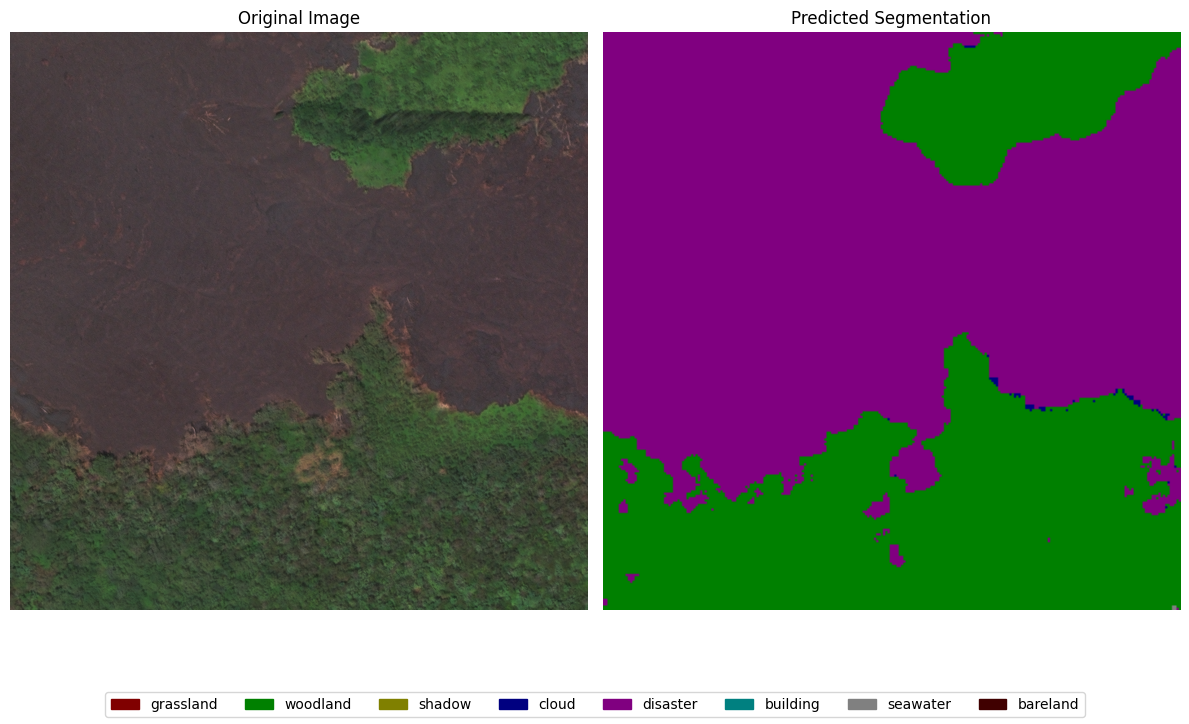

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000022_post_disaster.png')
visualize_str(image, label_to_color, label_names, model_seg)

1/1 [==============================] - 1s 1s/step


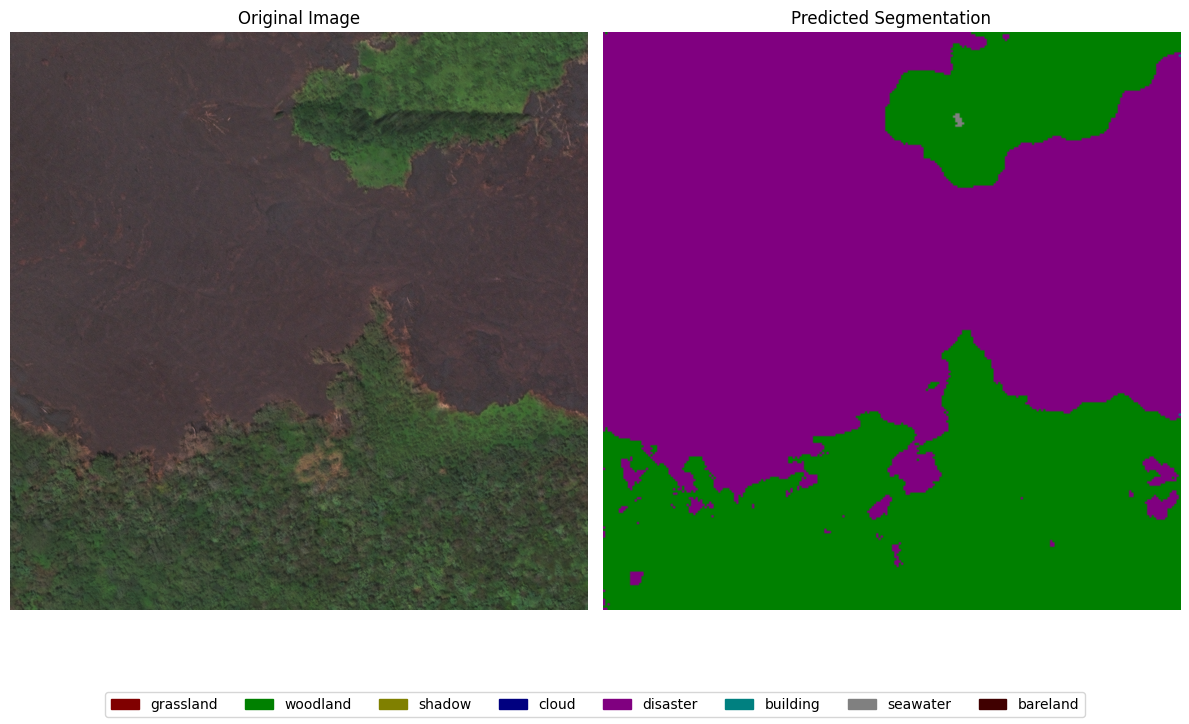

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000022_post_disaster.png')
visualize_str(image, label_to_color, label_names, model_psp)

1/1 [==============================] - 0s 22ms/step


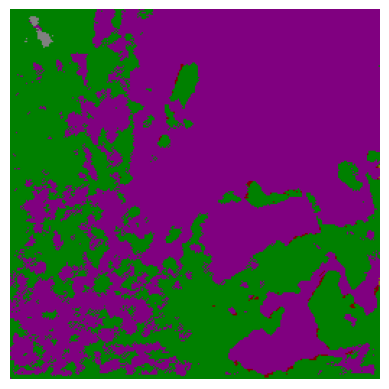

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000026_post_disaster.png')
vis(image, model_fcn)

1/1 [==============================] - 1s 1s/step


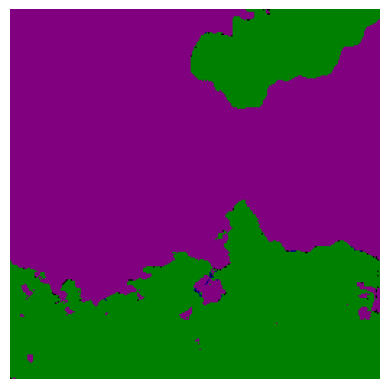

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000022_post_disaster.png')
vis(image, model_unet)

1/1 [==============================] - 1s 1s/step


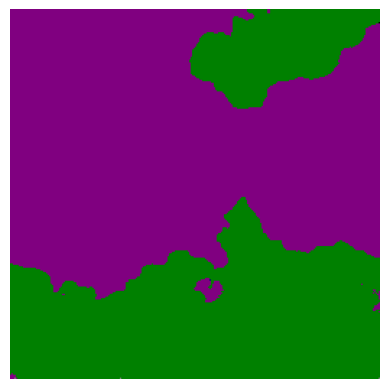

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000022_post_disaster.png')
vis(image, model_unet_res)

1/1 [==============================] - 1s 916ms/step


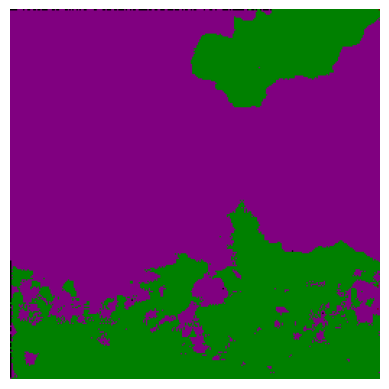

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000022_post_disaster.png')
vis(image, model_unet_att)

1/1 [==============================] - 1s 1s/step


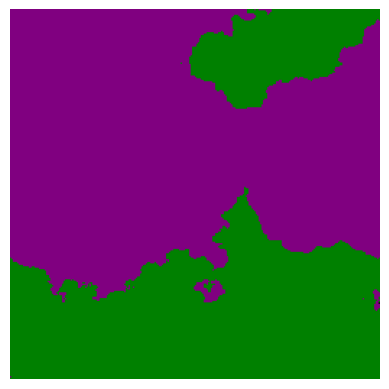

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000022_post_disaster.png')
vis(image, model_unet_res_att)

1/1 [==============================] - 1s 1s/step


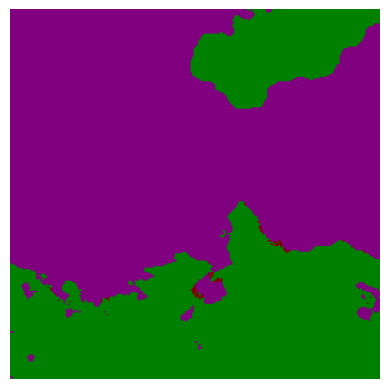

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000022_post_disaster.png')
viss(image, model_unet_without)

1/1 [==============================] - 0s 27ms/step


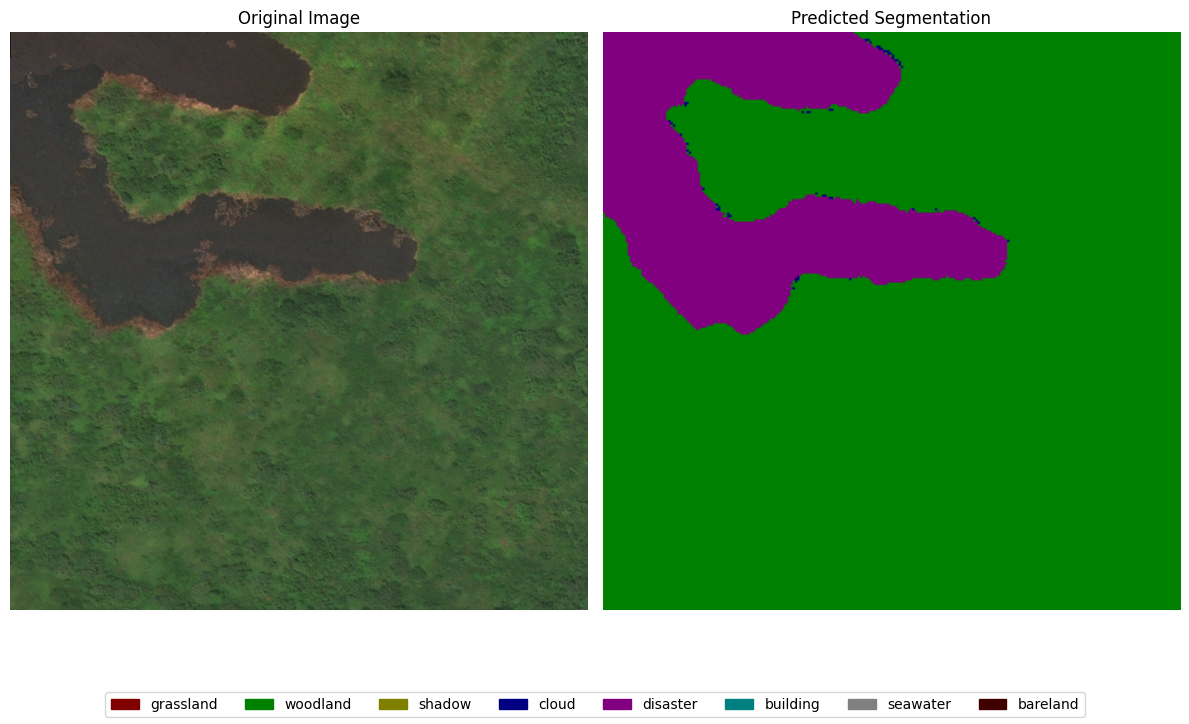

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000002_post_disaster.png')
vis(image, model_fcn)

1/1 [==============================] - 0s 24ms/step


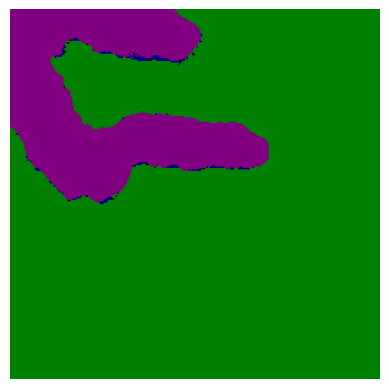

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000002_post_disaster.png')
vis(image, model_unet)

1/1 [==============================] - 0s 25ms/step


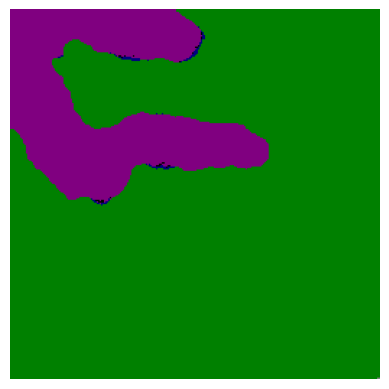

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000002_post_disaster.png')
vis(image, model_unet_res)

1/1 [==============================] - 0s 30ms/step


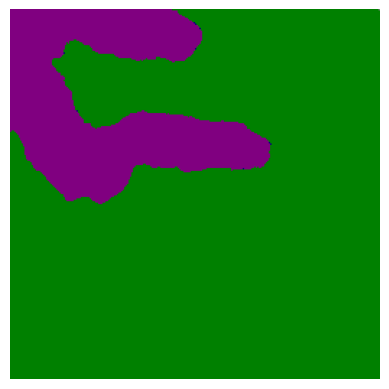

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000002_post_disaster.png')
vis(image, model_unet_att)

1/1 [==============================] - 0s 34ms/step


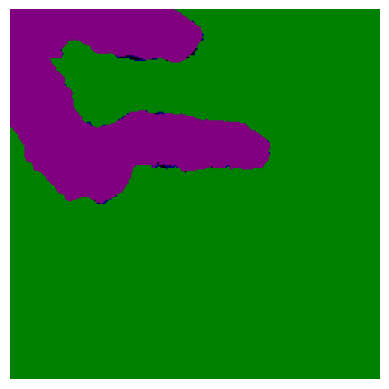

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000002_post_disaster.png')
vis(image, model_unet_res_att)

1/1 [==============================] - 0s 21ms/step


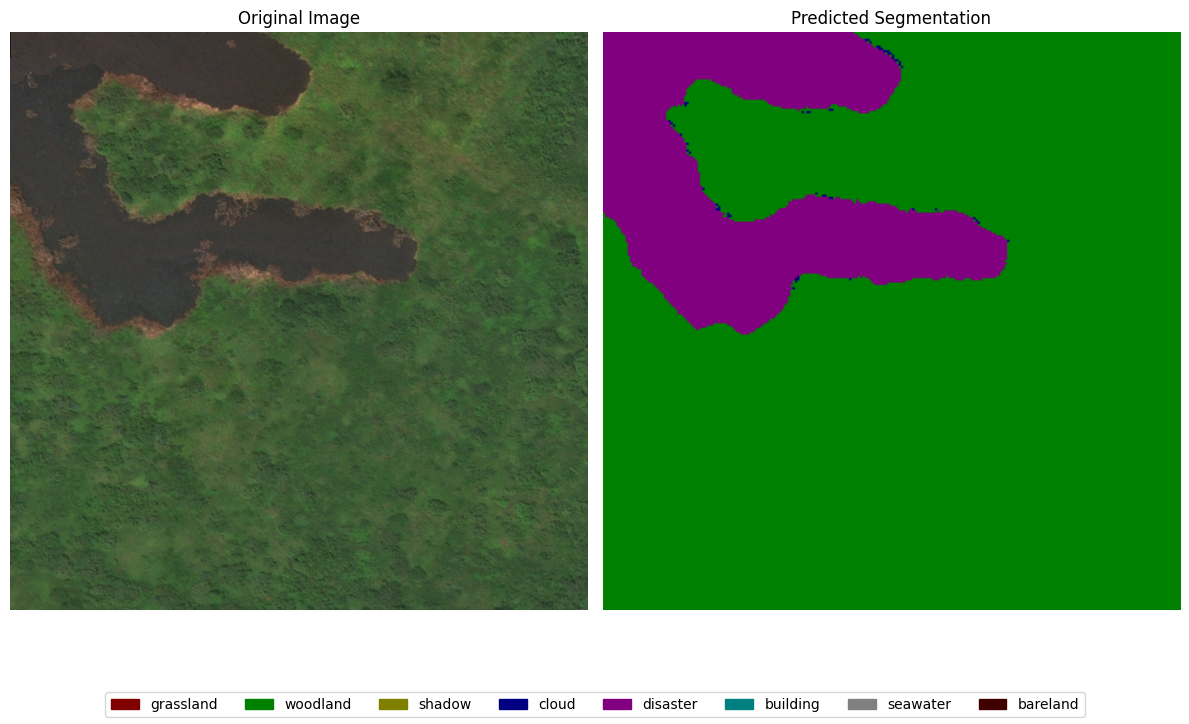

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000002_post_disaster.png')
visualize_str(image, label_to_color, label_names, model_fcn)

1/1 [==============================] - 0s 20ms/step


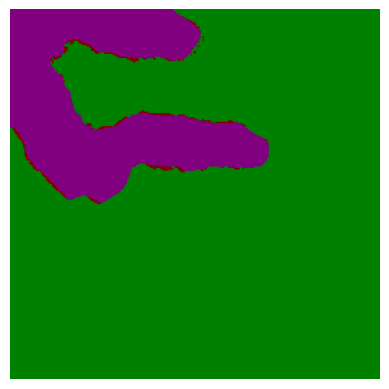

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000002_post_disaster.png')
viss(image, model_unet_without)

1/1 [==============================] - 0s 23ms/step


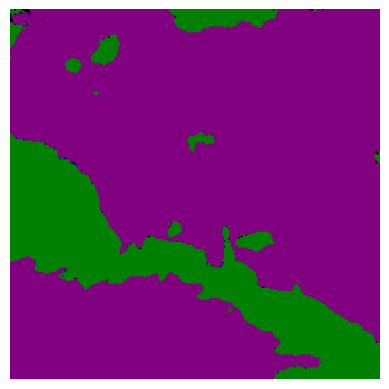

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000073_post_disaster.png')
vis(image, model_unet)

1/1 [==============================] - 0s 23ms/step


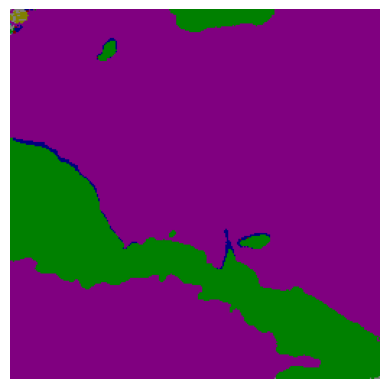

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000073_post_disaster.png')
vis(image, model_unet_res)

1/1 [==============================] - 0s 32ms/step


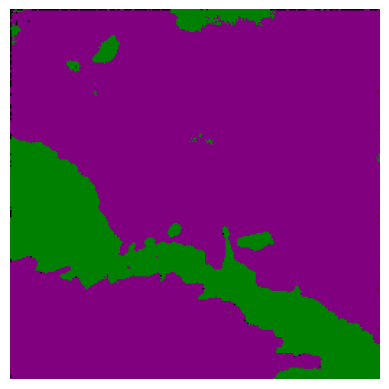

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/lower-puna-volcano_00000073_post_disaster.png')
vis(image, model_unet_att)

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['accuracy'], 'bo-', label='Training Accuracy')
    plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
history_path = '/content/drive/MyDrive/Unet_history.pkl'
model_path = '/content/drive/MyDrive/Unet.h5'
test_data_path = '/content/drive/MyDrive/test_data.npz'
with open(history_path, 'rb') as f:
    history = pickle.load(f)

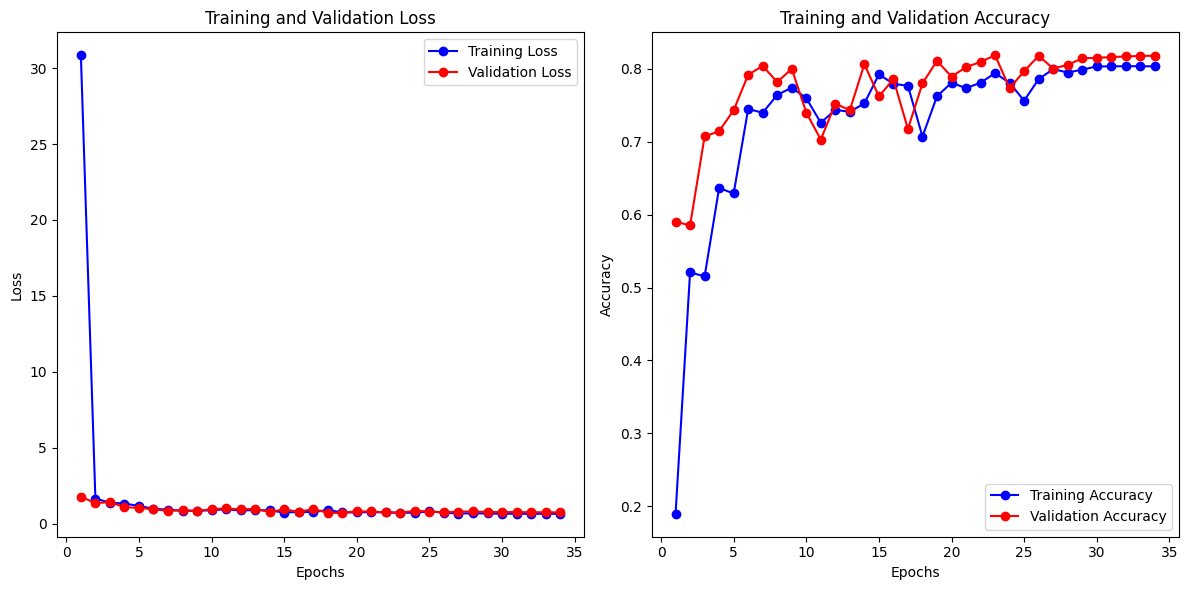

In [ ]:
plot_loss_and_accuracy(history)

In [ ]:
history_path = '/content/drive/MyDrive/Unet_res_history.pkl'
model_path = '/content/drive/MyDrive/Unet_res.h5'
test_data_path = '/content/drive/MyDrive/test_data.npz'
with open(history_path, 'rb') as f:
    history = pickle.load(f)

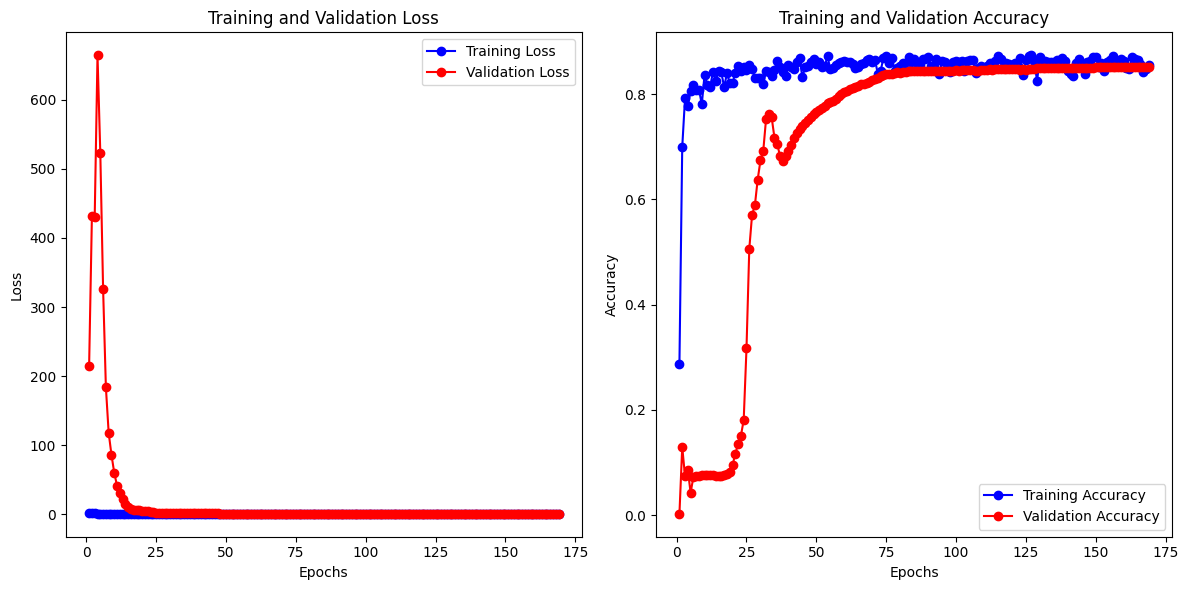

In [ ]:
plot_loss_and_accuracy(history)

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_and_plot_confusion_matrix(model_path, x_test, y_test, classes, normalize=True):
    model = load_model(model_path)
    y_pred = model.predict(x_test)

    y_pred_flat = np.argmax(y_pred, axis=-1).reshape(-1)
    y_test_flat = np.argmax(y_test, axis=-1).reshape(-1)

    cm = confusion_matrix(y_test_flat, y_pred_flat)
    if normalize:
      # 归一化混淆矩阵
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
model_path = '/content/drive/MyDrive/UnetPP.h5'
test_data_path = '/content/drive/MyDrive/test_data.npz'

In [ ]:
data = np.load(test_data_path)
x_test = data['x_test']
y_test = data['y_test']

In [ ]:
classes = [label_names[i] for i in sorted(label_names)]

In [ ]:
print(classes)

['background', 'grassland', 'woodland', 'shadow', 'cloud', 'disaster', 'building', 'seawater', 'bareland']


1/1 [==============================] - 4s 4s/step


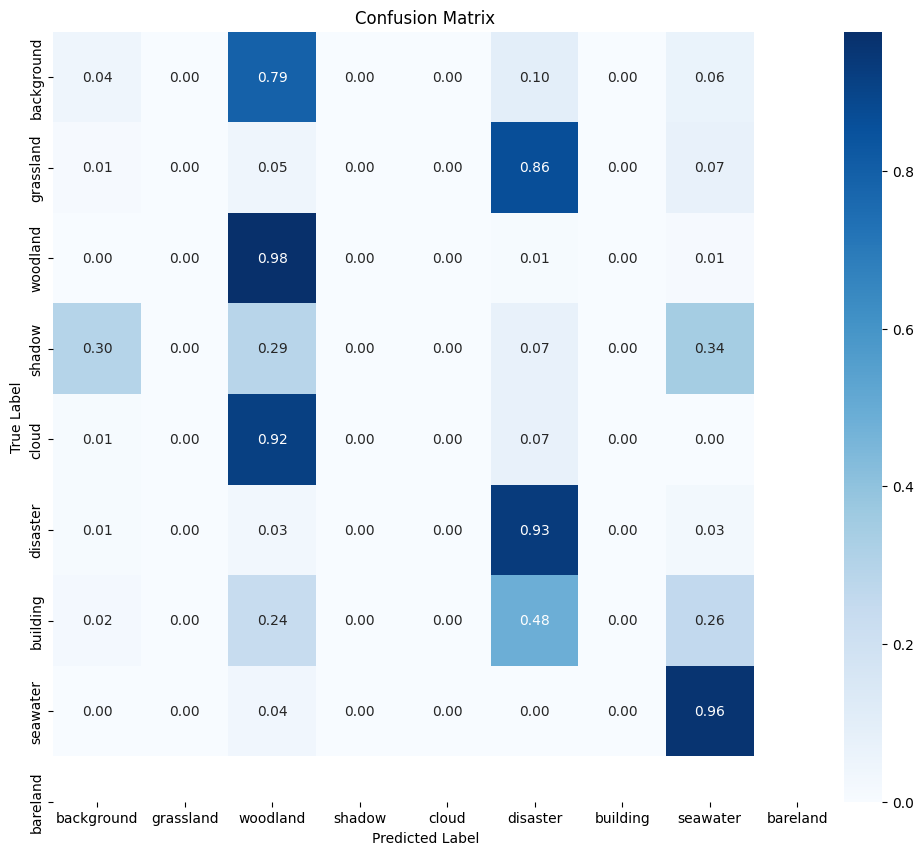

In [ ]:
evaluate_and_plot_confusion_matrix(model_path, x_test, y_test, classes)

In [ ]:
print("y_test shape:", y_test.shape)
model = load_model(model_path)
y_pred = model.predict(x_test)
print("y_pred shape:", y_pred.shape)

y_test shape: (25, 256, 256, 8)
1/1 [==============================] - 0s 462ms/step
y_pred shape: (25, 256, 256, 8)


## **KNN**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def parse_labelmap_knn(labelmap_path):
    label_to_color = {}
    with open(labelmap_path, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            if i == 0 or not line.strip():  # Skip header or empty lines
                continue
            parts = line.strip().split(':')
            color = tuple(map(int, parts[1].split(',')))
            label_to_color[i - 1] = color
    return label_to_color

In [ ]:
def load_images_and_masks_knn(image_folder, mask_folder, img_size=(256, 256)):
    images = []
    masks = []
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.png') or f.endswith('.jpg')]
    for filename in tqdm(image_files, desc="Loading images", unit="image"):
        image_path = os.path.join(image_folder, filename)
        mask_filename = filename.split('.')[0] + '.png'
        mask_path = os.path.join(mask_folder, mask_filename)
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if image is None or mask is None:
            continue
        image = cv2.resize(image, img_size)
        mask = cv2.resize(mask, img_size, interpolation=cv2.INTER_NEAREST)
        images.append(image)
        masks.append(mask)
    return np.array(images), np.array(masks)

In [ ]:
def calculate_accuracy_per_class(true_masks, segmented_masks, num_classes):
    class_accuracy = [0] * num_classes
    class_counts = [0] * num_classes

    for true_mask, segmented_mask in zip(true_masks, segmented_masks):
        for class_idx in range(num_classes):
            true_mask_class = (true_mask == class_idx)
            segmented_mask_class = (segmented_mask == class_idx)
            correct_pixels = np.sum(true_mask_class & segmented_mask_class)
            class_accuracy[class_idx] += correct_pixels
            class_counts[class_idx] += np.sum(true_mask_class)

    class_accuracy_percentage = [acc / count if count != 0 else 0 for acc, count in zip(class_accuracy, class_counts)]
    return class_accuracy_percentage

In [ ]:
def apply_kmeans_and_knn(image, mask, num_classes, label_to_color):
    # 使用 K-means 对图像进行分割
    features = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=num_classes, random_state=42)
    kmeans.fit(features)
    labels = kmeans.labels_.reshape(image.shape[:2])

    # 将分割结果作为新的标签
    new_labels = labels.flatten()

    # 使用 KNN 进行分类预测
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(features, new_labels)
    predicted_labels = knn.predict(features)
    segmented_image = predicted_labels.reshape(image.shape[:2])

    return segmented_image

In [ ]:
labelmap_path = '/content/drive/MyDrive/VolDisaster/labelmap.txt'
image_folder = '/content/drive/MyDrive/imagess'
mask_folder = '/content/drive/MyDrive/masksss'

label_to_color = parse_labelmap_knn(labelmap_path)

images, masks = load_images_and_masks_knn(image_folder, mask_folder)

# 选择要处理的图像索引
image_index = 0
image = images[image_index]
mask = masks[image_index]

# 聚类数量
num_classes = len(label_to_color)

# 进行图像分割和分类预测
segmented_image = apply_kmeans_and_knn(image, mask, num_classes, label_to_color)

# 计算每个类别的准确率
class_accuracy = calculate_accuracy_per_class(mask, segmented_image, num_classes)

# 输出每个类别的准确率
for class_idx, acc in enumerate(class_accuracy):
    print(f"Class {class_idx} Accuracy: {acc:.2%}")

# 计算总体准确率
accuracy = accuracy_score(mask.flatten(), segmented_image.flatten())
print(f"Segmentation Accuracy: {accuracy:.2%}")

Loading images: 100%|██████████| 95/95 [00:06<00:00, 15.13image/s]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class 0 Accuracy: 5.01%
Class 1 Accuracy: 0.00%
Class 2 Accuracy: 0.00%
Class 3 Accuracy: 0.00%
Class 4 Accuracy: 0.00%
Class 5 Accuracy: 0.00%
Class 6 Accuracy: 0.00%
Class 7 Accuracy: 0.00%
Class 8 Accuracy: 0.00%
Segmentation Accuracy: 0.14%


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

# 加载图像
image_path = '/content/drive/MyDrive/imagess/lower-puna-volcano_00000056_post_disaster.png'
image = cv2.imread(image_path)

# 进行图像分割和分类预测
num_classes = len(label_to_color)
segmented_image = apply_kmeans_and_knn(image, mask, num_classes, label_to_color)

# 将预测的标签转换为彩色分割图
color_segmented_image = np.zeros_like(image)
for label, color in label_to_color.items():
    color_segmented_image[segmented_image == label] = color

# 显示预测的彩色分割图
cv2_imshow(color_segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 如果需要保存预测的彩色分割图，可以使用以下代码
# cv2.imwrite('predicted_segmentation.png', color_segmented_image)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


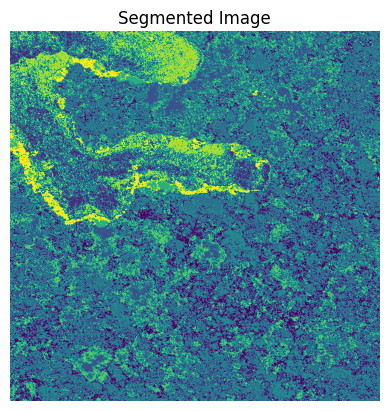

In [ ]:
image_path = '/content/drive/MyDrive/imagess/lower-puna-volcano_00000002_post_disaster.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 对应的掩码路径
mask_filename = os.path.basename(image_path).split('.')[0] + '.png'
mask_path = os.path.join(mask_folder, mask_filename)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# 聚类数量
num_classes = len(label_to_color)

# 进行图像分割和分类预测
segmented_image = apply_kmeans_and_knn(image, mask, num_classes, label_to_color)

# 可视化结果
import matplotlib.pyplot as plt

plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


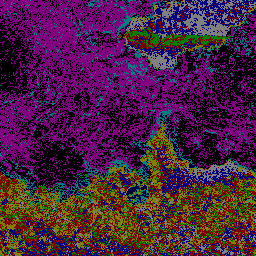

ValueError: operands could not be broadcast together with shapes (256,3) (256,) 

In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from google.colab.patches import cv2_imshow

def parse_labelmap_svm(labelmap_path):
    label_to_color = {}
    with open(labelmap_path, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            if i == 0 or not line.strip():  # Skip header or empty lines
                continue
            parts = line.strip().split(':')
            color = tuple(map(int, parts[1].split(',')))
            label_to_color[i - 1] = color
    return label_to_color

def load_image(image_path, img_size=(256, 256)):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file '{image_path}' not found.")
    image = cv2.resize(image, img_size)
    return image

def apply_kmeans_and_svm(image, num_classes, label_to_color):
    # 使用 K-means 对图像进行分割
    features = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=num_classes, random_state=42)
    kmeans.fit(features)
    labels = kmeans.labels_.reshape(image.shape[:2])

    # 将分割结果作为新的标签
    new_labels = labels.flatten()

    # 使用 SVM 进行分类预测
    svm = SVC(kernel='linear')
    svm.fit(features, new_labels)
    predicted_labels = svm.predict(features)
    segmented_image = predicted_labels.reshape(image.shape[:2])

    return segmented_image

def calculate_accuracy_per_class(true_masks, segmented_masks, num_classes):
    class_correct = [0] * num_classes
    class_total = [0] * num_classes
    total_correct = 0
    total_pixels = np.prod(true_masks.shape)

    for true_mask, segmented_mask in zip(true_masks, segmented_masks):
        for class_idx in range(num_classes):
            true_mask_class = (true_mask == class_idx)
            segmented_mask_class = (segmented_mask == class_idx)
            correct_pixels = np.sum(np.logical_and(true_mask_class, segmented_mask_class))
            class_correct[class_idx] += correct_pixels
            class_total[class_idx] += np.sum(true_mask_class)
            total_correct += correct_pixels

    class_accuracy = [correct / total if total != 0 else 0 for correct, total in zip(class_correct, class_total)]
    total_accuracy = total_correct / total_pixels

    return class_accuracy, total_accuracy

# 文件路径
labelmap_path = '/content/drive/MyDrive/VolDisaster/labelmap.txt'
image_path = '/content/drive/MyDrive/imagess/lower-puna-volcano_00000022_post_disaster.png'

# 解析标签映射
label_to_color = parse_labelmap_svm(labelmap_path)

# 加载图像
image = load_image(image_path)

# 聚类数量
num_classes = len(label_to_color)

# 进行图像分割和分类预测
segmented_image = apply_kmeans_and_svm(image, num_classes, label_to_color)

# 显示预测的彩色分割图
color_segmented_image = np.zeros_like(image)
for label, color in label_to_color.items():
    color_segmented_image[segmented_image == label] = color
cv2_imshow(color_segmented_image)


mask_path = '/content/drive/MyDrive/masksss/lower-puna-volcano_00000193_post_disaster.png'
mask = load_image(mask_path)
class_accuracy, total_accuracy = calculate_accuracy_per_class(mask, segmented_image, num_classes)
print(f"Class Accuracy: {class_accuracy}")
print(f"Total Accuracy: {total_accuracy}")

In [ ]:
print(mask.shape)
print(segmented_image.shape)

(256, 256, 3)
(256, 256)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


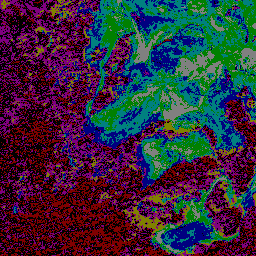

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC

def parse_labelmap_svm(labelmap_path):
    label_to_color = {}
    with open(labelmap_path, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            if i == 0 or not line.strip():  # Skip header or empty lines
                continue
            parts = line.strip().split(':')
            color = tuple(map(int, parts[1].split(',')))
            label_to_color[i - 1] = color
    return label_to_color

def load_image(image_path, img_size=(256, 256)):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file '{image_path}' not found.")
    image = cv2.resize(image, img_size)
    return image

def apply_kmeans_and_svm(image, num_classes, label_to_color):
    # 使用 K-means 对图像进行分割
    features = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=num_classes, random_state=42)
    kmeans.fit(features)
    labels = kmeans.labels_.reshape(image.shape[:2])

    # 将分割结果作为新的标签
    new_labels = labels.flatten()

    # 使用 SVM 进行分类预测
    svm = SVC(kernel='linear')
    svm.fit(features, new_labels)
    predicted_labels = svm.predict(features)
    segmented_image = predicted_labels.reshape(image.shape[:2])

    return segmented_image

# 文件路径
labelmap_path = '/content/drive/MyDrive/VolDisaster/labelmap.txt'
image_path = '/content/drive/MyDrive/imagess/lower-puna-volcano_00000026_post_disaster.png'

# 解析标签映射
label_to_color = parse_labelmap_svm(labelmap_path)

# 加载图像
image = load_image(image_path)

# 聚类数量
num_classes = len(label_to_color)

# 进行图像分割和分类预测
segmented_image = apply_kmeans_and_svm(image, num_classes, label_to_color)

# 将预测的标签转换为彩色分割图
color_segmented_image = np.zeros_like(image)
for label, color in label_to_color.items():
    color_segmented_image[segmented_image == label] = color

# 显示预测的彩色分割图
cv2_imshow(color_segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
from skimage import io, img_as_ubyte, color, util
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import numpy as np

image_path = '/content/drive/MyDrive/imagess/lower-puna-volcano_00000002_post_disaster.png'
image = io.imread(image_path)

if image.shape[2] == 4:
    image = image[:, :, :3]

if len(image.shape) > 2:
    image = color.rgb2gray(image)
    image = img_as_ubyte(image)

image = util.img_as_ubyte(image)

entropy_image = np.zeros(image.shape)
homogeneity_image = np.zeros(image.shape)
asm_image = np.zeros(image.shape)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        sub_image = image[max(i - 1, 0):min(i + 2, image.shape[0]), max(j - 1, 0):min(j + 2, image.shape[1])]
        glcm = graycomatrix(sub_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

        entropy_image[i, j] = -np.sum(glcm * np.log2(glcm + 1e-12))
        homogeneity_image[i, j] = graycoprops(glcm, 'homogeneity')
        asm_image[i, j] = graycoprops(glcm, 'ASM')

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(entropy_image, cmap='gray')
ax[0].set_title('Entropy')
ax[1].imshow(homogeneity_image, cmap='gray')
ax[1].set_title('Homogeneity')
ax[2].imshow(asm_image, cmap='gray')
ax[2].set_title('ASM')
plt.show()

<ipython-input-1-cc636b58da6e>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  homogeneity_image[i, j] = graycoprops(glcm, 'homogeneity')
<ipython-input-1-cc636b58da6e>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  asm_image[i, j] = graycoprops(glcm, 'ASM')
